<a href="https://colab.research.google.com/github/Diegogluc/Adidas_Webstore_Shoe_data/blob/main/Tera_challenge_data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [205]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

The objective of the proposed challenge is to do an exploratory analysis of data of games that were launched on the past 45 years

In [206]:
ds1 = pd.read_csv('/content/drive/MyDrive/Desafio_Tera/dataset1.csv', encoding='latin-1')
ds2 = pd.read_csv('/content/drive/MyDrive/Desafio_Tera//dataset2.csv', encoding='latin-1')
ds3 = pd.read_csv('/content/drive/MyDrive/Desafio_Tera//dataset3.csv', encoding='latin-1')

In [207]:
ds1.head()

Id                      Name Platform Year_of_Release         Genre  \
0   1                Wii Sports      NaN            2006        Sports   
1   2         Super Mario Bros.      NES            1985      Platform   
2   3            Mario Kart Wii      NaN            2008        Racing   
3   4         Wii Sports Resort      NaN            2009        Sports   
4   5  Pokemon Red/Pokemon Blue       GB            1996  Role-Playing   

  Publisher NA_Sales EU_Sales JP_Sales Other_Sales Global_Sales  
0  Nintendo    41.36    28.96     3.77        8.45        82.53  
1  Nintendo    29.08     3.58     6.81        0.77        40.24  
2  Nintendo    15.68    12.76     3.79        3.29        35.52  
3  Nintendo    15.61    10.93     3.28        2.95        32.77  
4  Nintendo    11.27     8.89    10.22         1,0        31.37

In [208]:
# Check if the Global_sales = ds1['NA_Sales'] + ds1['EU_Sales'] + ds1['JP_Sales'] + ds1['Other_Sales']
ds1['Total_Sales'] = ds1['NA_Sales'] + ds1['EU_Sales'] + ds1['JP_Sales'] + ds1['Other_Sales']
ds1.head()


Id                      Name Platform Year_of_Release         Genre  \
0   1                Wii Sports      NaN            2006        Sports   
1   2         Super Mario Bros.      NES            1985      Platform   
2   3            Mario Kart Wii      NaN            2008        Racing   
3   4         Wii Sports Resort      NaN            2009        Sports   
4   5  Pokemon Red/Pokemon Blue       GB            1996  Role-Playing   

  Publisher NA_Sales EU_Sales JP_Sales Other_Sales Global_Sales  \
0  Nintendo    41.36    28.96     3.77        8.45        82.53   
1  Nintendo    29.08     3.58     6.81        0.77        40.24   
2  Nintendo    15.68    12.76     3.79        3.29        35.52   
3  Nintendo    15.61    10.93     3.28        2.95        32.77   
4  Nintendo    11.27     8.89    10.22         1,0        31.37   

          Total_Sales  
0  41.3628.963.778.45  
1   29.083.586.810.77  
2  15.6812.763.793.29  
3  15.6110.933.282.95  
4   11.278.8910.221,0

In [209]:
# The new column Total_Sales acquired wrong values, this might ocoured due to format errors in the other columns
ds1.drop(columns='Total_Sales',inplace=True)

In [210]:
ds1.dtypes

Id                  int64
Name               object
Platform           object
Year_of_Release    object
Genre              object
Publisher          object
NA_Sales           object
EU_Sales           object
JP_Sales           object
Other_Sales        object
Global_Sales       object
dtype: object

In [211]:
num_rows = len(ds1.index)
num_columns = len(ds1.columns)
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")


Number of rows: 106
Number of columns: 11


$$
\begin{array}{|l|l|l|l|}
\hline
\textbf{Variable} & \textbf{Data Type} & \textbf{Type of Variable} & \textbf{Description} \\
\hline
1. \text{ID} & \text{Serial} & \text{Categorical - Nominal} & \text{Game ID} \\
\hline
2. \text{Name} & \text{String} & \text{Categorical - Nominal} & \text{Original name of the game in English} \\
\hline
3. \text{Platform} & \text{String} & \text{Categorical - Nominal} & \text{Name of the platform on which the game was published} \\
\hline
4. \text{Year_of_Release} & \text{Date} & \text{Quantitative - Discrete} & \text{Year in which the game was released} \\
\hline
5. \text{Genre} & \text{String} & \text{Categorical - Nominal} & \text{Game Genre} \\
\hline
6. \text{Publisher} & \text{String} & \text{Categorical - Nominal} & \text{Name of the company that published the game} \\
\hline
7. \text{NA_Sales} & \text{Float} & \text{Quantitative - Discrete} & \text{Number of sales in North America} \\
\hline
8. \text{EU_Sales} & \text{Float} & \text{Quantitative - Discrete} & \text{Number of sales in the European Union} \\
\hline
9. \text{JP_Sales} & \text{Float} & \text{Quantitative - Discrete} & \text{Number of sales in Japan} \\
\hline
10. \text{Other_Sales} & \text{Float} & \text{Quantitative - Discrete} & \text{Number of sales in other countries} \\
\hline
11. \text{Global_Sales} & \text{Float} & \text{Quantitative - Discrete} & \text{Sum of all sales (NA_Sales + EU_Sales + JP_Sales + Other_Sales)} \\
\hline
\end{array}
$$

### Tidiness of the dataset

The sales columns configure the dataset as a non Tidy format. In order to change to a Tidy format, a column regarding the country in wich the sales was made must be created and the global sales must be suppressed


Hipotesis on how the dataset might have been acquired:
1. Web research for relevant games;
2. Archives for videogame data.
<br>
<br>

Some of the possible are:
1. https://gamehistory.org/ -> web archive of videogame;
2. Google search;
3. Wikipedia.
<br>
<br>

Possible transformations:
1. Year_of_release cleaned so it will only have the year (drop month and day);
3. Platform only the most relevant (games can be published in more then one platform);
2. Number of sales transformed to millions.



In [212]:
# First visual check for null values
ds1.isnull()

Id   Name  Platform  Year_of_Release  Genre  Publisher  NA_Sales  \
0    False  False      True            False  False      False     False   
1    False  False     False            False  False      False     False   
2    False  False      True            False  False      False     False   
3    False  False      True            False  False      False     False   
4    False  False     False            False  False      False     False   
..     ...    ...       ...              ...    ...        ...       ...   
101  False  False     False            False  False      False     False   
102  False  False     False            False  False      False     False   
103  False  False     False            False  False      False     False   
104  False  False     False            False  False      False     False   
105  False  False     False            False  False      False     False   

     EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0       False     False        False         False  
1       False     False        False         False  
2       False     False        False         False  
3       False     False        False         False  
4       False     False        False         False  
..        ...       ...          ...           ...  
101     False     False        False          True  
102     False     False        False          True  
103     False     False        False          True  
104     False     False        False         False  
105     False     False        False         False  

[106 rows x 11 columns]

In [213]:
# Check the amount of null values per column
for column in ds1.columns.values:
  print("Number of null items in ",column,' : ',ds1[column].isnull().sum() )

Number of null items in  Id  :  0
Number of null items in  Name  :  1
Number of null items in  Platform  :  9
Number of null items in  Year_of_Release  :  1
Number of null items in  Genre  :  1
Number of null items in  Publisher  :  1
Number of null items in  NA_Sales  :  1
Number of null items in  EU_Sales  :  1
Number of null items in  JP_Sales  :  5
Number of null items in  Other_Sales  :  1
Number of null items in  Global_Sales  :  29


In [214]:
# Check for duplicates based on the name of the game
if len(ds1['Name']) - ds1['Name'].nunique() == 0:
  print("There are no duplicates in the Name column")
else:
  print("There are duplicates in the Name column")

There are duplicates in the Name column


In [215]:
# Get the name of all games that have more than an entry
ds1.groupby(['Name'])['Id'].nunique().loc[lambda x: x > 1]

Name
Call of Duty: Black Ops           2
Call of Duty: Black Ops 3         2
Call of Duty: Black Ops II        2
Call of Duty: Ghosts              2
Call of Duty: Modern Warfare 2    2
Call of Duty: Modern Warfare 3    2
Grand Theft Auto IV               2
Grand Theft Auto V                3
Super Mario 64                    2
Name: Id, dtype: int64

In [216]:
# check the motive for the duplicates based on the platform
for index in ds1.groupby(['Name'])['Id'].nunique().loc[lambda x: x > 1].index:
  print((ds1[["Id","Name","Platform",'NA_Sales']][ds1['Name'] == index]),'\n')


    Id                     Name Platform NA_Sales
33  33  Call of Duty: Black Ops     X360      9.7
42  42  Call of Duty: Black Ops      PS3     5.99 

      Id                       Name Platform NA_Sales
32    32  Call of Duty: Black Ops 3      PS4     6.03
105  100  Call of Duty: Black Ops 3     XOne     4.59 

    Id                        Name Platform NA_Sales
35  35  Call of Duty: Black Ops II      PS3     4.99
36  36  Call of Duty: Black Ops II     X360     8.25 

    Id                  Name Platform NA_Sales
61  61  Call of Duty: Ghosts     X360     6.73
62  61  Call of Duty: Ghosts     X360     6.73
71  70  Call of Duty: Ghosts      PS3      4.1 

    Id                            Name Platform NA_Sales
37  37  Call of Duty: Modern Warfare 2     X360     8.52
56  56  Call of Duty: Modern Warfare 2      PS3     4.99 

    Id                            Name Platform NA_Sales
30  30  Call of Duty: Modern Warfare 3     X360     9.04
38  38  Call of Duty: Modern Warfare 3      PS

### There are entries that seem to be duplicates, but are actually the same game but for different platforms

In [217]:
# Check the platforms in which the games were published
unique_platforms = ds1['Platform'].unique()
print('The platforms analysed were:\n', *unique_platforms, sep='\t', end='\n\n')

unique_genre = ds1['Genre'].unique()
print('The genre of games analysed were:\n', *unique_genre, sep='\t', end='\n\n')

unique_publisher = ds1['Publisher'].unique()
print('The publishers analysed were:\n', *unique_publisher, sep='\t', end='\n\n')

The platforms analysed were:
	nan	NES	GB	DS	X360	PS3	PS2	SNES	GBA	PS4	3DS	Wii	X3600000	N64	PS	XB	PC	2600	PSP	XOne

The genre of games analysed were:
	Sports	Platform	Racing	Role-Playing	Puzzle	Misc	Shooter	Simulation	Action	Fighting	Adventure	nan

The publishers analysed were:
	Nintendo	Ñintendo	Microsoft Game Studios	Take-Two Interactive	Sony Computer Entertainment	Activision	NINTENDO	Ubisoft	nintendo	Bethesda Softworks	Electronic Arts	nan	Sega	SquareSoft	Atari



In [218]:
ds1[ds1.columns[7:12]].describe()

EU_Sales JP_Sales Other_Sales Global_Sales
count       105      101         105           77
unique       89       80          84           74
top        1.72     0.13        1.28        10.25
freq          3        5           5            2

___
### First evaluation
* Ids in the column "Id" is not unique to each game / input
* Some basic evaluation show that there are several errors in the data collection that make impossible some basic analysis such as min, max P25 and P75 of the float values (they were registered as strings)
* There are null values in almost every column of the dataset, making it necessary a good process of data cleansing
* The quality of the data is not the best, errors in the platform name, publishers with the same name but with subtle differences
* Other problems observed are:
  * Sales values with "," instead of "."
  * Years_of_release with different standards or wrong values
  * Most columns are set as object (strings)

___

In [219]:
# First transformation is to create a column that will be used as the primary key column
index_col = ds1.index
ds1.insert(0, 'Index', index_col)
ds1.head()

Index  Id                      Name Platform Year_of_Release         Genre  \
0      0   1                Wii Sports      NaN            2006        Sports   
1      1   2         Super Mario Bros.      NES            1985      Platform   
2      2   3            Mario Kart Wii      NaN            2008        Racing   
3      3   4         Wii Sports Resort      NaN            2009        Sports   
4      4   5  Pokemon Red/Pokemon Blue       GB            1996  Role-Playing   

  Publisher NA_Sales EU_Sales JP_Sales Other_Sales Global_Sales  
0  Nintendo    41.36    28.96     3.77        8.45        82.53  
1  Nintendo    29.08     3.58     6.81        0.77        40.24  
2  Nintendo    15.68    12.76     3.79        3.29        35.52  
3  Nintendo    15.61    10.93     3.28        2.95        32.77  
4  Nintendo    11.27     8.89    10.22         1,0        31.37

In [220]:
# There are invalid data in the Year_of_Release column, so a list of all this invalid data should be generated in order to correct them
invalid_data = []
current_year = 2025
min_valid_year = current_year - 45

for index, data in ds1['Year_of_Release'].items():
    try:
        # Try to convert the value to an integer
        year = int(data)
        if len(str(year)) != 4 or year < min_valid_year or year > current_year:
            invalid_data.append({'Id': ds1['Id'][index], 'Year_of_Release': data})
    except ValueError:
        # If conversion to integer fails, it's likely an invalid format
        invalid_data.append({'Id': ds1['Id'][index], 'Year_of_Release': data})
    except TypeError:
        # Handle cases where the value might not be a string or number
        invalid_data.append({'Id': ds1['Id'][index], 'Year_of_Release': data})

invalid_data = pd.DataFrame(invalid_data)

ds1[ds1['Id'].isin(invalid_data['Id'])]

Index  Id                                  Name Platform Year_of_Release  \
24     24  24                    Grand Theft Auto V     X360       9/17/2013   
33     33  33               Call of Duty: Black Ops     X360           20100   
49     49  49                        Gran Turismo 4      PS2           12004   
72     72  71        Call of Duty 4: Modern Warfare     X360            3007   
82     82  79                                Halo 2       XB            1804   
86     86  83                         GoldenEye 007      N64            1997   
87     87  83                                   NaN      NaN             NaN   
99     99  94  The Legend of Zelda: Ocarina of Time      N64            1948   

      Genre                    Publisher NA_Sales EU_Sales JP_Sales  \
24   Action         Take-Two Interactive     9.66     5.14     0.06   
33  Shooter                   Activision      9.7     3.68     0.11   
49   Racing  Sony Computer Entertainment     3.01     0.01      1.1   
72  Shooter                   Activision     5.93     2.36     0.13   
82  Shooter       Microsoft Game Studios     6.82     1.53     0.05   
86  Shooter                     nintendo      5.8     2.01     0.13   
87      NaN                          NaN      NaN      NaN      NaN   
99   Action                     NINTENDO      4.1     1.89     1.45   

   Other_Sales Global_Sales  
24        1.41        16.27  
33        1.13        14.61  
49        7.53        11.66  
72         0.9         9,31  
82        0.08          NaN  
86        0.15          NaN  
87         NaN          NaN  
99        0.16          7,6

In [221]:
# Research the actual year of release of each game above and remove the entry with all values = to Nan
# Drop the nan row
try:
    if 87 in ds1.index and pd.isna(ds1['Year_of_Release'].loc[87]):
        ds1 = ds1.dropna(subset=['Name'])
    else:
        print("Row at index 87 either doesn't exist or 'Year_of_Release' is not NaN.")
except KeyError:
    print("Index 87 not found in ds1.")

# Change for the real years of release of the games
Real_year_of_Release = [2013, 2004, 2007, 2004, 1997, 1998]
year_mapping = dict(zip(invalid_data['Id'], Real_year_of_Release))
ds1['Year_of_Release'] = ds1.apply(
    lambda row: year_mapping[row['Id']] if row['Id'] in year_mapping else row['Year_of_Release'],
    axis=1
)

ds1[ds1['Id'].isin(invalid_data['Id'])]

<ipython-input-221-6c225bf27d20>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds1['Year_of_Release'] = ds1.apply(


Index  Id                                  Name Platform Year_of_Release  \
24     24  24                    Grand Theft Auto V     X360            2013   
33     33  33               Call of Duty: Black Ops     X360            2004   
49     49  49                        Gran Turismo 4      PS2            2007   
72     72  71        Call of Duty 4: Modern Warfare     X360            2004   
82     82  79                                Halo 2       XB            1997   
86     86  83                         GoldenEye 007      N64            1998   
99     99  94  The Legend of Zelda: Ocarina of Time      N64            1948   

      Genre                    Publisher NA_Sales EU_Sales JP_Sales  \
24   Action         Take-Two Interactive     9.66     5.14     0.06   
33  Shooter                   Activision      9.7     3.68     0.11   
49   Racing  Sony Computer Entertainment     3.01     0.01      1.1   
72  Shooter                   Activision     5.93     2.36     0.13   
82  Shooter       Microsoft Game Studios     6.82     1.53     0.05   
86  Shooter                     nintendo      5.8     2.01     0.13   
99   Action                     NINTENDO      4.1     1.89     1.45   

   Other_Sales Global_Sales  
24        1.41        16.27  
33        1.13        14.61  
49        7.53        11.66  
72         0.9         9,31  
82        0.08          NaN  
86        0.15          NaN  
99        0.16          7,6

In [222]:
# It can be noted that a value of the column Global_sale has a "," instead of ".", thus all columns must be changed
for columns in ds1.columns[7:12]:
  ds1[columns] = ds1[columns].str.replace(',', '.')
ds1[ds1['Id'].isin(invalid_data['Id'])]

Index  Id                                  Name Platform Year_of_Release  \
24     24  24                    Grand Theft Auto V     X360            2013   
33     33  33               Call of Duty: Black Ops     X360            2004   
49     49  49                        Gran Turismo 4      PS2            2007   
72     72  71        Call of Duty 4: Modern Warfare     X360            2004   
82     82  79                                Halo 2       XB            1997   
86     86  83                         GoldenEye 007      N64            1998   
99     99  94  The Legend of Zelda: Ocarina of Time      N64            1948   

      Genre                    Publisher NA_Sales EU_Sales JP_Sales  \
24   Action         Take-Two Interactive     9.66     5.14     0.06   
33  Shooter                   Activision      9.7     3.68     0.11   
49   Racing  Sony Computer Entertainment     3.01     0.01      1.1   
72  Shooter                   Activision     5.93     2.36     0.13   
82  Shooter       Microsoft Game Studios     6.82     1.53     0.05   
86  Shooter                     nintendo      5.8     2.01     0.13   
99   Action                     NINTENDO      4.1     1.89     1.45   

   Other_Sales Global_Sales  
24        1.41        16.27  
33        1.13        14.61  
49        7.53        11.66  
72         0.9         9.31  
82        0.08          NaN  
86        0.15          NaN  
99        0.16          7.6

In [223]:
column_types = [int, int, object, object, 'datetime64[ns]', object, object, float, float, float, float, float]

if len(ds1.columns) == len(column_types):
    for i, column_name in enumerate(ds1.columns):
        ds1[column_name] = ds1[column_name].astype(column_types[i])

    ds1['Year_of_Release'] = pd.to_datetime(ds1['Year_of_Release']).dt.year

else:
    print("Error: The length of 'column_types' does not match the number of columns in 'ds1'.")

___
### Now all the columns have the correct type and any futher transformation can be done
___

In [224]:
# This evaluation was not possible before
ds1[ds1.columns[7:12]].describe()

NA_Sales   EU_Sales    JP_Sales  Other_Sales  Global_Sales
count  105.000000  105.00000  101.000000   105.000000     77.000000
mean     6.831143    4.31200    2.038911     1.327524     15.944416
std      5.828768    3.46308    2.039578     1.538784     10.743223
min      0.660000    0.01000    0.010000     0.080000      7.390000
25%      3.740000    2.36000    0.240000     0.580000      9.870000
50%      5.700000    3.48000    1.580000     0.910000     12.660000
75%      7.970000    5.35000    3.280000     1.570000     20.150000
max     41.360000   28.96000   10.220000    10.570000     82.530000

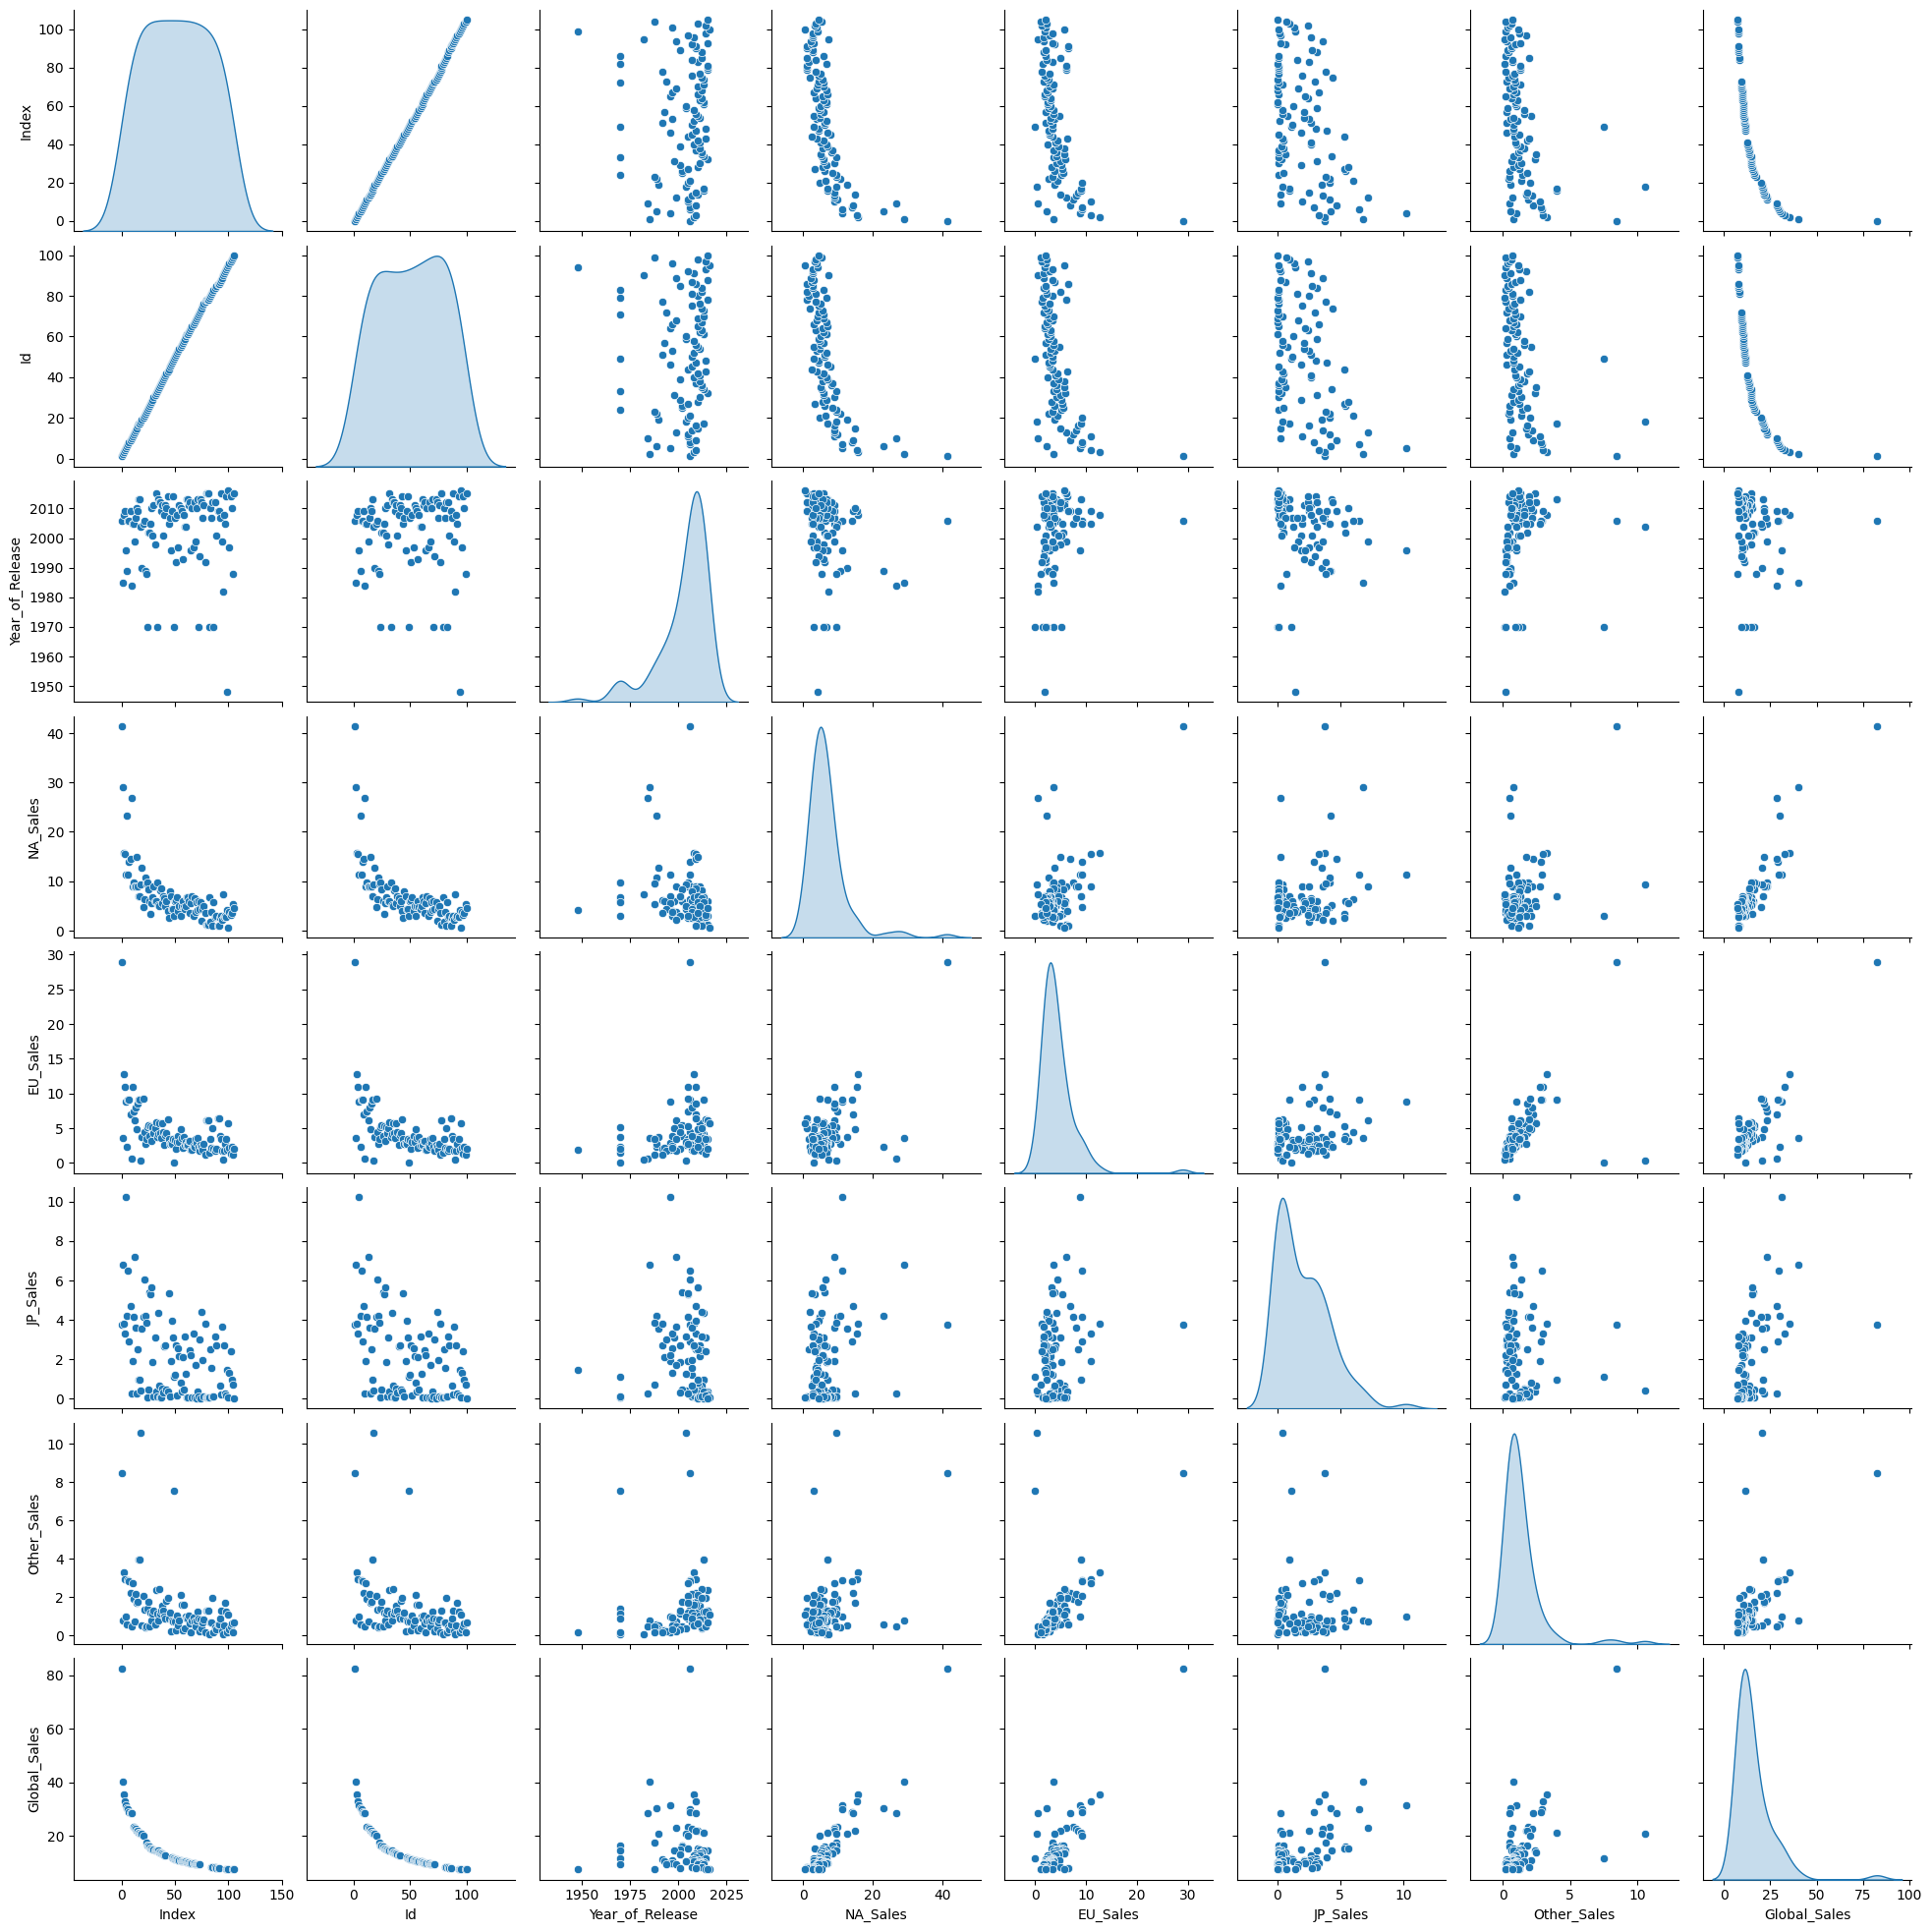

In [225]:
# Using pairplot fron seaboorn to check the behaviour of the dataset
sns.pairplot(ds1, diag_kind="kde", dropna=True)

<ipython-input-226-4443e1c59813>:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()  # Display the legend


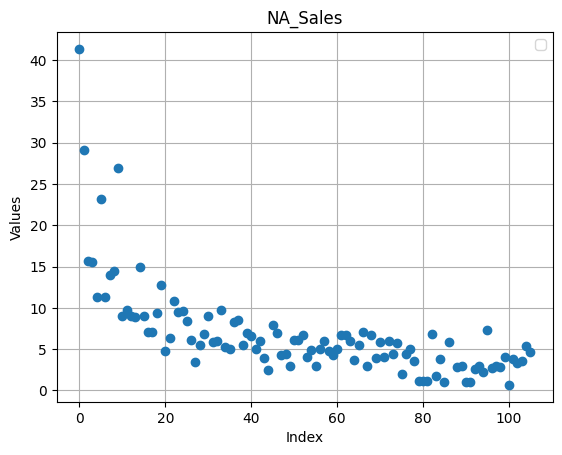

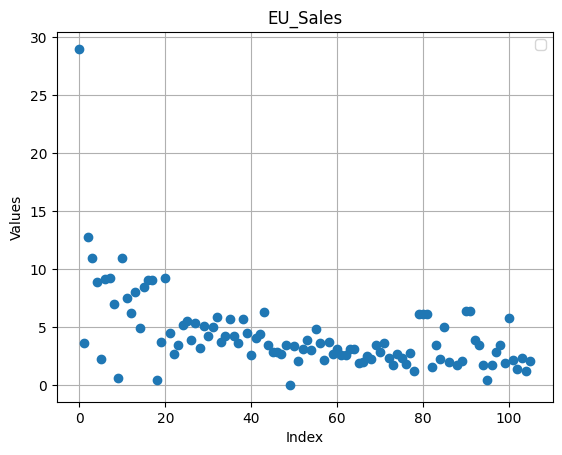

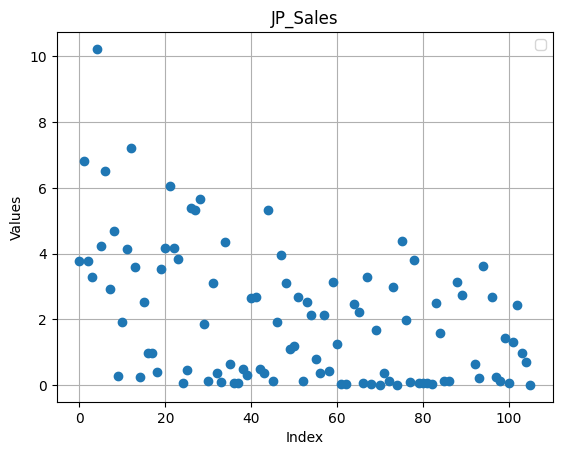

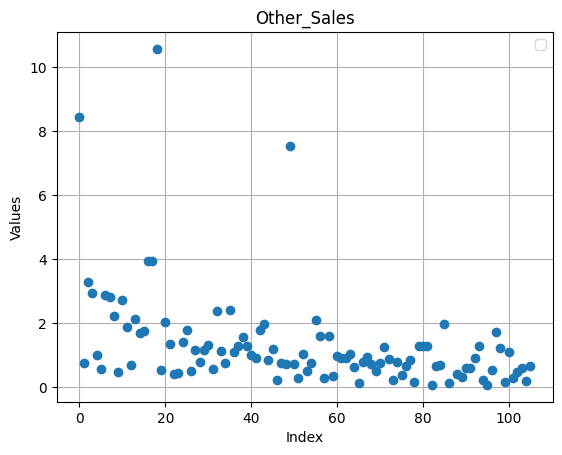

In [226]:
# Simple plot of the Sales to understan their pattern
for columns in ds1.columns[7:11]:
  plt.plot(ds1[columns],'o')

  plt.xlabel('Index')  # Add a general x-axis label if needed
  plt.ylabel('Values') # Add a general y-axis label if needed
  plt.title(columns) # Add a general title for the plot
  plt.legend()  # Display the legend
  plt.grid(True)  # Optional: Add a grid for better readability
  plt.show()


### Cleaning process

1. Check null values in the column Platform

In [227]:
# Checking the games with the column "Plataform" null
ds1[ds1['Platform'].isnull()]

Index  Id                       Name Platform  Year_of_Release     Genre  \
0       0   1                 Wii Sports      NaN             2006    Sports   
2       2   3             Mario Kart Wii      NaN             2008    Racing   
3       3   4          Wii Sports Resort      NaN             2009    Sports   
7       7   8                   Wii Play      NaN             2006      Misc   
8       8   9  New Super Mario Bros. Wii      NaN             2009  Platform   
13     13  14                    Wii Fit      NaN             2007    Sports   
15     15  16               Wii Fit Plus      NaN             2009    Sports   
83     83  80                  Wii Party      NaN             2010      Misc   

   Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0   Nintendo     41.36     28.96      3.77         8.45         82.53  
2   Nintendo     15.68     12.76      3.79         3.29         35.52  
3   Nintendo     15.61     10.93      3.28         2.95         32.77  
7   Nintendo     13.96      9.18      2.93         2.84         28.92  
8   Nintendo     14.44      6.94      4.70         2.24         28.32  
13  Nintendo      8.92      8.03      3.60         2.15         22.70  
15  Nintendo      9.01      8.49      2.53         1.77         21.79  
83  Nintendo      1.75      3.47      2.49         0.67           NaN

All games with NaN plataform have Wii in their names and all are from earlier than 2012, the year Nintendo shipped the Nintendo Wii U. All of these games can be considered from the Wii plataform.

In [228]:
ds1['Platform'].fillna('Wii', inplace=True)
ds1[ds1['Platform'].isnull()]

<ipython-input-228-8ed4ff0d74e7>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ds1['Platform'].fillna('Wii', inplace=True)


Empty DataFrame
Columns: [Index, Id, Name, Platform, Year_of_Release, Genre, Publisher, NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales]
Index: []

2. Correct rows with "Platform" = 'X3600000'

In [229]:
ds1[ds1['Platform'] == 'X3600000']

Index  Id         Name  Platform  Year_of_Release    Genre  \
45     45  45       Halo 3  X3600000             2007  Shooter   
66     66  65  Halo: Reach  X3600000             2010  Shooter   
68     68  67       Halo 4  X3600000             2012  Shooter   

                 Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
45  Microsoft Game Studios      7.97      2.81      0.13         1.21   
66  Microsoft Game Studios      7.04      1.95      0.08         0.79   
68  Microsoft Game Studios      6.65      2.28      0.04         0.74   

    Global_Sales  
45           NaN  
66          9.86  
68          9.71

In [230]:
ds1.loc[ds1['Platform'] == 'X3600000', 'Platform'] = 'X360'
ds1[ds1['Platform'] == 'X360']

Index  Id                            Name Platform  Year_of_Release  \
14     14  15              Kinect Adventures!     X360             2010   
24     24  24              Grand Theft Auto V     X360             1970   
30     30  30  Call of Duty: Modern Warfare 3     X360             2011   
33     33  33         Call of Duty: Black Ops     X360             1970   
36     36  36      Call of Duty: Black Ops II     X360             2012   
37     37  37  Call of Duty: Modern Warfare 2     X360             2009   
45     45  45                          Halo 3     X360             2007   
52     52  52             Grand Theft Auto IV     X360             2008   
61     61  61            Call of Duty: Ghosts     X360             2013   
62     62  61            Call of Duty: Ghosts     X360             2013   
66     66  65                     Halo: Reach     X360             2010   
68     68  67                          Halo 4     X360             2012   
72     72  71  Call of Duty 4: Modern Warfare     X360             1970   
74     74  73                       Minecraft     X360             2013   
77     77  76     The Elder Scrolls V: Skyrim     X360             2011   

           Genre               Publisher  NA_Sales  EU_Sales  JP_Sales  \
14          Misc  Microsoft Game Studios     15.00      4.89      0.24   
24        Action    Take-Two Interactive      9.66      5.14      0.06   
30       Shooter              Activision      9.04      4.24      0.13   
33       Shooter              Activision      9.70      3.68      0.11   
36       Shooter              Activision      8.25      4.24      0.07   
37       Shooter              Activision      8.52      3.59      0.08   
45       Shooter  Microsoft Game Studios      7.97      2.81      0.13   
52        Action    Take-Two Interactive      6.76      3.07      0.14   
61       Shooter              Activision      6.73      2.56      0.04   
62       Shooter              Activision      6.73      2.56      0.04   
66       Shooter  Microsoft Game Studios      7.04      1.95      0.08   
68       Shooter  Microsoft Game Studios      6.65      2.28      0.04   
72       Shooter              Activision      5.93      2.36      0.13   
74          Misc  Microsoft Game Studios      5.70      2.65      0.02   
77  Role-Playing      Bethesda Softworks      5.05      2.79      0.10   

    Other_Sales  Global_Sales  
14         1.69         21.81  
24         1.41         16.27  
30         1.32         14.73  
33         1.13         14.61  
36         1.12         13.67  
37         1.28         13.47  
45         1.21           NaN  
52         1.03         11.01  
61         0.91         10.25  
62         0.91         10.25  
66         0.79          9.86  
68         0.74          9.71  
72         0.90          9.31  
74         0.81           NaN  
77         0.85           NaN

3.

In [231]:
ds1[ds1['Genre'].isna()]

Empty DataFrame
Columns: [Index, Id, Name, Platform, Year_of_Release, Genre, Publisher, NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales]
Index: []

In [232]:
ds1[ds1['Genre'] == 'Misc']

Index  Id                                          Name Platform  \
7       7   8                                      Wii Play      Wii   
14     14  15                            Kinect Adventures!     X360   
20     20  20  Brain Age: Train Your Brain in Minutes a Day       DS   
63     63  62                                  Just Dance 3      Wii   
70     70  69                                  Just Dance 2      Wii   
74     74  73                                     Minecraft     X360   
76     76  75                                Mario Party DS       DS   
83     83  80                                     Wii Party      Wii   
84     84  81                                 Mario Party 8      Wii   

    Year_of_Release Genre               Publisher  NA_Sales  EU_Sales  \
7              2006  Misc                Nintendo     13.96      9.18   
14             2010  Misc  Microsoft Game Studios     15.00      4.89   
20             2005  Misc                Nintendo      4.74      9.20   
63             2011  Misc                 Ubisoft      5.95      3.11   
70             2010  Misc                 Ubisoft      5.80      2.85   
74             2013  Misc  Microsoft Game Studios      5.70      2.65   
76             2007  Misc                Nintendo      4.40      1.85   
83             2010  Misc                Nintendo      1.75      3.47   
84             2007  Misc                Nintendo      3.74      2.24   

    JP_Sales  Other_Sales  Global_Sales  
7       2.93         2.84         28.92  
14      0.24         1.69         21.81  
20      4.16         2.04         20.15  
63       NaN         1.06         10.12  
70      0.01         0.78          9.44  
74      0.02         0.81           NaN  
76      1.98         0.68           NaN  
83      2.49         0.67           NaN  
84      1.58         0.70          8.27

3. Standardize entries with different spellings

In [233]:
ds1.loc[(ds1['Publisher'] == 'NINTENDO') | (ds1['Publisher'] == 'nintendo') | (ds1['Publisher'] == 'Ñintendo'), 'Publisher'] = 'Nintendo'
ds1[ds1['Publisher'] == 'Nintendo']

Index  Id                                          Name Platform  \
0        0   1                                    Wii Sports      Wii   
1        1   2                             Super Mario Bros.      NES   
2        2   3                                Mario Kart Wii      Wii   
3        3   4                             Wii Sports Resort      Wii   
4        4   5                      Pokemon Red/Pokemon Blue       GB   
5        5   6                                        Tetris       GB   
6        6   7                         New Super Mario Bros.       DS   
7        7   8                                      Wii Play      Wii   
8        8   9                     New Super Mario Bros. Wii      Wii   
9        9  10                                     Duck Hunt      NES   
10      10  11                                    Nintendogs       DS   
11      11  12                                 Mario Kart DS       DS   
12      12  13                   Pokemon Gold/Pokemon Silver       GB   
13      13  14                                       Wii Fit      Wii   
15      15  16                                  Wii Fit Plus      Wii   
19      19  19                             Super Mario World     SNES   
20      20  20  Brain Age: Train Your Brain in Minutes a Day       DS   
21      21  21                 Pokemon Diamond/Pokemon Pearl       DS   
22      22  22                              Super Mario Land       GB   
23      23  23                           Super Mario Bros. 3      NES   
26      26  26                 Pokemon Ruby/Pokemon Sapphire      GBA   
27      27  27   Brain Age 2: More Training in Minutes a Day       DS   
28      28  28                   Pokemon Black/Pokemon White       DS   
31      31  31      PokÃ©mon Yellow: Special Pikachu Edition       GB   
34      34  34                           Pokemon X/Pokemon Y      3DS   
40      40  40                       Super Smash Bros. Brawl      Wii   
41      41  41                                  Mario Kart 7      3DS   
44      44  44                   Animal Crossing: Wild World       DS   
46      46  46                                Super Mario 64      N64   
47      47  47          Pokemon HeartGold/Pokemon SoulSilver       DS   
48      48  48     Pokemon Omega Ruby/Pokemon Alpha Sapphire      3DS   
50      50  50                            Super Mario Galaxy      Wii   
51      51  51            Super Mario Land 2: 6 Golden Coins       GB   
54      54  54                           Super Mario 3D Land      3DS   
57      57  57                         Super Mario All-Stars     SNES   
59      59  59             Pokemon FireRed/Pokemon LeafGreen      GBA   
60      60  60                                Super Mario 64       DS   
64      64  63                       New Super Mario Bros. 2      3DS   
65      65  64                                 Mario Kart 64      N64   
73      73  72                           Donkey Kong Country     SNES   
75      75  74                     Animal Crossing: New Leaf      3DS   
76      76  75                                Mario Party DS       DS   
78      78  77                              Super Mario Kart     SNES   
83      83  80                                     Wii Party      Wii   
84      84  81                                 Mario Party 8      Wii   
86      86  83                                 GoldenEye 007      N64   
88      88  84               Pokemon Black 2/Pokemon White 2       DS   
96      96  91                     PokÃ©mon Platinum Version       DS   
99      99  94          The Legend of Zelda: Ocarina of Time      N64   
102    102  97           Super Smash Bros. for Wii U and 3DS      3DS   
103    103  98                          Super Mario Galaxy 2      Wii   
104    104  99                           Super Mario Bros. 2      NES   

     Year_of_Release         Genre Publisher  NA_Sales  EU_Sales  JP_Sales  \
0               2006        Sports  Nintendo     41.36   

___
### Accourding to the creators of the project:
* The dataset ds2 should be a clean and extended version of ds1
* ds3 is a complementary table to be linked with ds2
___

In [234]:
print(np.shape(ds1))
print(np.shape(ds2))

(105, 12)
(16719, 11)


In [235]:
ds2.head()

Id                      Name Platform  Year_of_Release         Genre  \
0   1                Wii Sports      Wii           2006.0        Sports   
1   2         Super Mario Bros.      NES           1985.0      Platform   
2   3            Mario Kart Wii      Wii           2008.0        Racing   
3   4         Wii Sports Resort      Wii           2009.0        Sports   
4   5  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   

  Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0  Nintendo     41.36     28.96      3.77         8.45         82.53  
1  Nintendo     29.08      3.58      6.81         0.77         40.24  
2  Nintendo     15.68     12.76      3.79         3.29         35.52  
3  Nintendo     15.61     10.93      3.28         2.95         32.77  
4  Nintendo     11.27      8.89     10.22         1.00         31.37

In [236]:
ds1.describe()

Index          Id  Year_of_Release    NA_Sales   EU_Sales  \
count  105.000000  105.000000       105.000000  105.000000  105.00000   
mean    52.171429   51.142857      2003.028571    6.831143    4.31200   
std     30.703438   28.970618        12.631202    5.828768    3.46308   
min      0.000000    1.000000      1948.000000    0.660000    0.01000   
25%     26.000000   26.000000      1999.000000    3.740000    2.36000   
50%     52.000000   52.000000      2007.000000    5.700000    3.48000   
75%     78.000000   77.000000      2011.000000    7.970000    5.35000   
max    105.000000  100.000000      2016.000000   41.360000   28.96000   

         JP_Sales  Other_Sales  Global_Sales  
count  101.000000   105.000000     77.000000  
mean     2.038911     1.327524     15.944416  
std      2.039578     1.538784     10.743223  
min      0.010000     0.080000      7.390000  
25%      0.240000     0.580000      9.870000  
50%      1.580000     0.910000     12.660000  
75%      3.280000     1.570000     20.150000  
max     10.220000    10.570000     82.530000

In [237]:
ds2.describe()

Id  Year_of_Release      NA_Sales      EU_Sales  \
count  16719.000000     16450.000000  16719.000000  16719.000000   
mean    8360.000000      2006.487356      0.263330      0.145025   
std     4826.503911         5.878995      0.813514      0.503283   
min        1.000000      1980.000000      0.000000      0.000000   
25%     4180.500000      2003.000000      0.000000      0.000000   
50%     8360.000000      2007.000000      0.080000      0.020000   
75%    12539.500000      2010.000000      0.240000      0.110000   
max    16719.000000      2020.000000     41.360000     28.960000   

           JP_Sales   Other_Sales  Global_Sales  
count  16719.000000  16719.000000  16719.000000  
mean       0.077602      0.047332      0.533543  
std        0.308818      0.186710      1.547935  
min        0.000000      0.000000      0.010000  
25%        0.000000      0.000000      0.060000  
50%        0.000000      0.010000      0.170000  
75%        0.040000      0.030000      0.470000  
max       10.220000     10.570000     82.530000

In [238]:
ds3.head()

Id                      Name Platform  Year_of_Release         Genre  \
0   1                Wii Sports      Wii           2006.0        Sports   
1   2         Super Mario Bros.      NES           1985.0      Platform   
2   3            Mario Kart Wii      Wii           2008.0        Racing   
3   4         Wii Sports Resort      Wii           2009.0        Sports   
4   5  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   

  Publisher  Critic_Score  Critic_Count User_Score  User_Count Developer  \
0  Nintendo          76.0          51.0          8       322.0  Nintendo   
1  Nintendo           NaN           NaN        NaN         NaN       NaN   
2  Nintendo          82.0          73.0        8.3       709.0  Nintendo   
3  Nintendo          80.0          73.0          8       192.0  Nintendo   
4  Nintendo           NaN           NaN        NaN         NaN       NaN   

  Rating  
0      E  
1    NaN  
2      E  
3      E  
4    NaN

___
Combining the tables ds2 and ds3
___

In [239]:
print('ds2 shape = ',np.shape(ds2))
print('ds3 shape = ',np.shape(ds3))

ds2 shape =  (16719, 11)
ds3 shape =  (16719, 12)


In [240]:
df = pd.merge(ds2, ds3, on='Id')

In [241]:
df.head()

Id                    Name_x Platform_x  Year_of_Release_x       Genre_x  \
0   1                Wii Sports        Wii             2006.0        Sports   
1   2         Super Mario Bros.        NES             1985.0      Platform   
2   3            Mario Kart Wii        Wii             2008.0        Racing   
3   4         Wii Sports Resort        Wii             2009.0        Sports   
4   5  Pokemon Red/Pokemon Blue         GB             1996.0  Role-Playing   

  Publisher_x  NA_Sales  EU_Sales  JP_Sales  Other_Sales  ...  Platform_y  \
0    Nintendo     41.36     28.96      3.77         8.45  ...         Wii   
1    Nintendo     29.08      3.58      6.81         0.77  ...         NES   
2    Nintendo     15.68     12.76      3.79         3.29  ...         Wii   
3    Nintendo     15.61     10.93      3.28         2.95  ...         Wii   
4    Nintendo     11.27      8.89     10.22         1.00  ...          GB   

  Year_of_Release_y       Genre_y  Publisher_y Critic_Score Critic_Count  \
0            2006.0        Sports     Nintendo         76.0         51.0   
1            1985.0      Platform     Nintendo          NaN          NaN   
2            2008.0        Racing     Nintendo         82.0         73.0   
3            2009.0        Sports     Nintendo         80.0         73.0   
4            1996.0  Role-Playing     Nintendo          NaN          NaN   

   User_Score  User_Count Developer  Rating  
0           8       322.0  Nintendo       E  
1         NaN         NaN       NaN     NaN  
2         8.3       709.0  Nintendo       E  
3           8       192.0  Nintendo       E  
4         NaN         NaN       NaN     NaN  

[5 rows x 22 columns]

In [242]:
df.columns

Index(['Id', 'Name_x', 'Platform_x', 'Year_of_Release_x', 'Genre_x',
       'Publisher_x', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales',
       'Global_Sales', 'Name_y', 'Platform_y', 'Year_of_Release_y', 'Genre_y',
       'Publisher_y', 'Critic_Score', 'Critic_Count', 'User_Score',
       'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [243]:
# Checking if the
print('Number of inequalities of Plataform: ', (df['Name_x'] == df['Name_y']).isna().sum())
print('Number of inequalities of Plataform: ', (df['Platform_x'] == df['Platform_y']).isna().sum())
print('Number of inequalities of Plataform: ', (df['Year_of_Release_x'] == df['Year_of_Release_y']).isna().sum())
print('Number of inequalities of Plataform: ', (df['Genre_x'] == df['Genre_y']).isna().sum())
print('Number of inequalities of Plataform: ', (df['Publisher_x'] == df['Publisher_y']).isna().sum())

Number of inequalities of Plataform:  0
Number of inequalities of Plataform:  0
Number of inequalities of Plataform:  0
Number of inequalities of Plataform:  0
Number of inequalities of Plataform:  0


In [244]:
# Droping collumns with same information
df.drop(columns=['Name_y','Platform_y','Year_of_Release_y','Genre_y','Publisher_y'],inplace=True)

# Renaming columns that got a 'x' value
columns_to_rename = {'Name_x': 'Name', 'Platform_x': 'Platform', 'Year_of_Release_x': 'Year_of_Release', 'Genre_x': 'Genre', 'Publisher_x': 'Publisher'}
df.rename(columns=columns_to_rename, inplace=True)

df.head()

Id                      Name Platform  Year_of_Release         Genre  \
0   1                Wii Sports      Wii           2006.0        Sports   
1   2         Super Mario Bros.      NES           1985.0      Platform   
2   3            Mario Kart Wii      Wii           2008.0        Racing   
3   4         Wii Sports Resort      Wii           2009.0        Sports   
4   5  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   

  Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  \
0  Nintendo     41.36     28.96      3.77         8.45         82.53   
1  Nintendo     29.08      3.58      6.81         0.77         40.24   
2  Nintendo     15.68     12.76      3.79         3.29         35.52   
3  Nintendo     15.61     10.93      3.28         2.95         32.77   
4  Nintendo     11.27      8.89     10.22         1.00         31.37   

   Critic_Score  Critic_Count User_Score  User_Count Developer Rating  
0          76.0          51.0          8       322.0  Nintendo      E  
1           NaN           NaN        NaN         NaN       NaN    NaN  
2          82.0          73.0        8.3       709.0  Nintendo      E  
3          80.0          73.0          8       192.0  Nintendo      E  
4           NaN           NaN        NaN         NaN       NaN    NaN

In [245]:
print(np.shape(df))
print(df.columns)

(16719, 17)
Index(['Id', 'Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher',
       'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales',
       'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Developer',
       'Rating'],
      dtype='object')


In [246]:
df.dtypes

Id                   int64
Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

___
Column 'user_score' must be transformed to fload64
___

In [247]:
print(df['User_Score'].value_counts())

User_Score
tbd    2425
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.3       2
1         2
0.9       2
0         1
9.7       1
Name: count, Length: 96, dtype: int64


In [248]:
# tbd is not a possible value -> transform to NaN
df.loc[df['User_Score'] == 'tbd', 'User_Score'] = np.nan
df['User_Score'] = df['User_Score'].astype('float64')

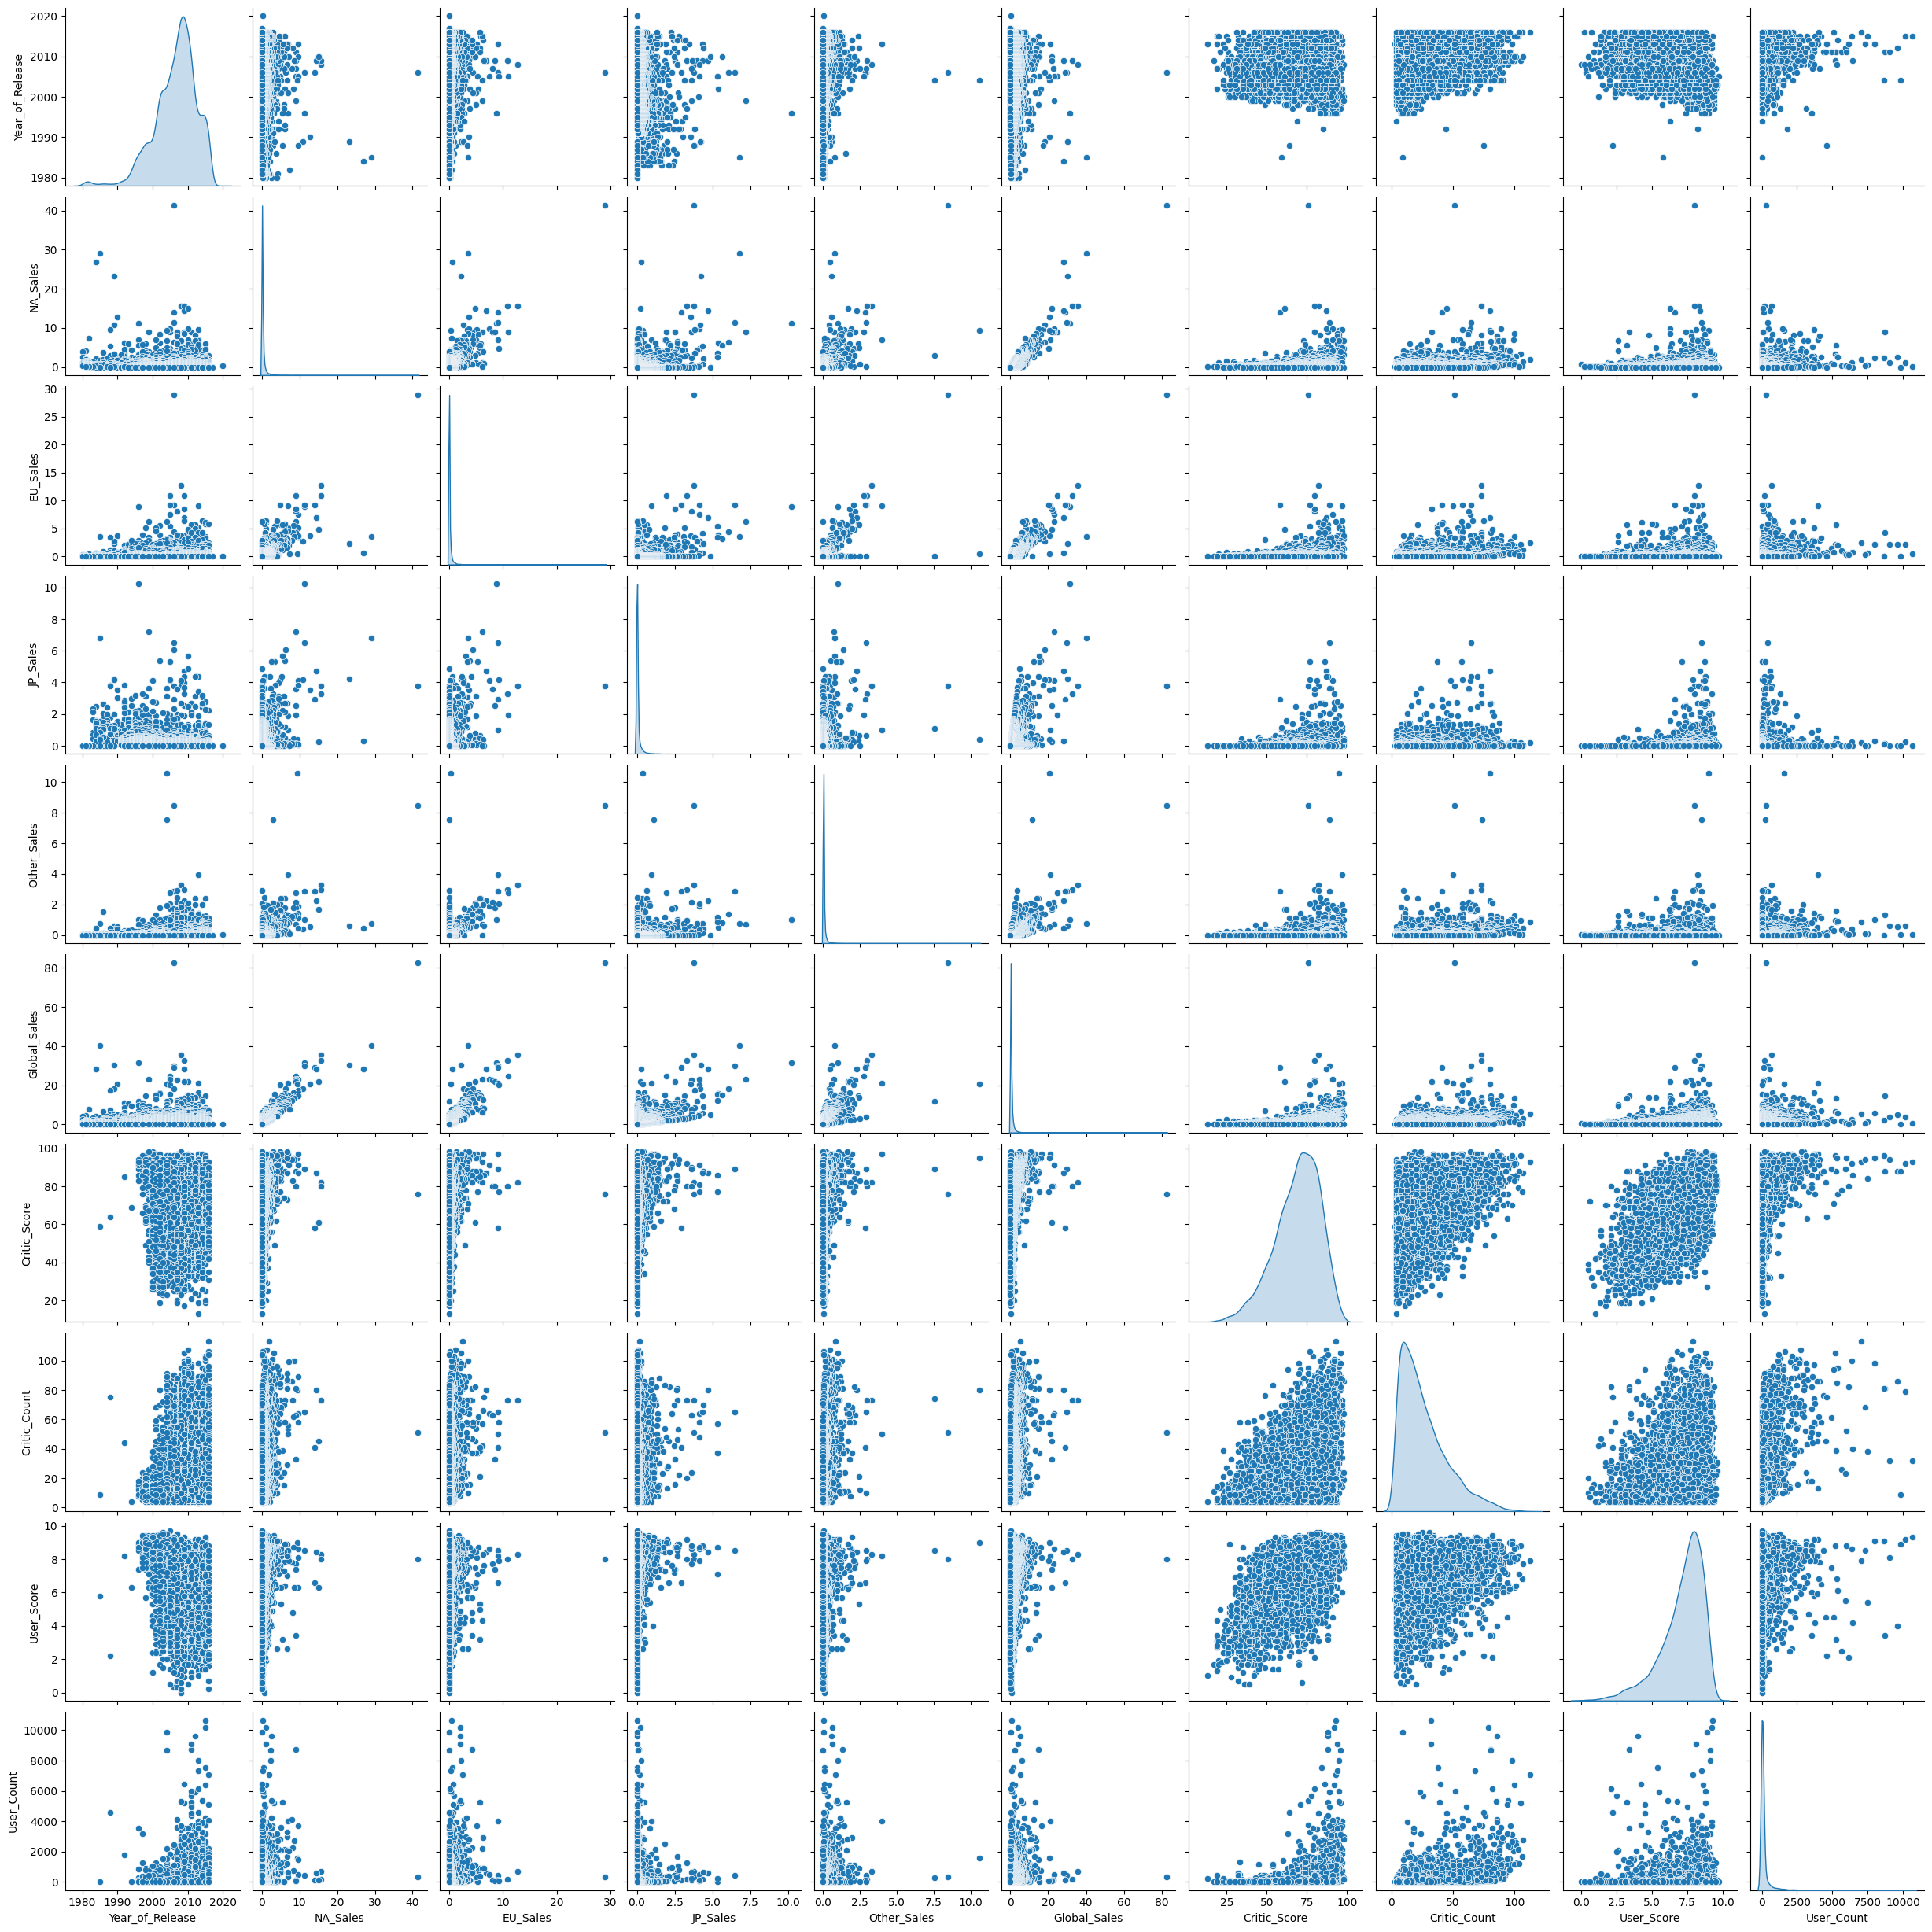

In [250]:
sns.pairplot(df[['Year_of_Release','NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales',
       'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Developer',
       'Rating']], diag_kind="kde", dropna=True)

In [251]:
# Simple description of float and int variables
df.describe()

Id  Year_of_Release      NA_Sales      EU_Sales  \
count  16719.000000     16450.000000  16719.000000  16719.000000   
mean    8360.000000      2006.487356      0.263330      0.145025   
std     4826.503911         5.878995      0.813514      0.503283   
min        1.000000      1980.000000      0.000000      0.000000   
25%     4180.500000      2003.000000      0.000000      0.000000   
50%     8360.000000      2007.000000      0.080000      0.020000   
75%    12539.500000      2010.000000      0.240000      0.110000   
max    16719.000000      2020.000000     41.360000     28.960000   

           JP_Sales   Other_Sales  Global_Sales  Critic_Score  Critic_Count  \
count  16719.000000  16719.000000  16719.000000   8137.000000   8137.000000   
mean       0.077602      0.047332      0.533543     68.967679     26.360821   
std        0.308818      0.186710      1.547935     13.938165     18.980495   
min        0.000000      0.000000      0.010000     13.000000      3.000000   
25%        0.000000      0.000000      0.060000     60.000000     12.000000   
50%        0.000000      0.010000      0.170000     71.000000     21.000000   
75%        0.040000      0.030000      0.470000     79.000000     36.000000   
max       10.220000     10.570000     82.530000     98.000000    113.000000   

        User_Score    User_Count  
count  7590.000000   7590.000000  
mean      7.125046    162.229908  
std       1.500006    561.282326  
min       0.000000      4.000000  
25%       6.400000     10.000000  
50%       7.500000     24.000000  
75%       8.200000     81.000000  
max       9.700000  10665.000000

In [252]:
# Checking the years with most game releases
df['Year_of_Release'].value_counts().head()

Year_of_Release
2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
Name: count, dtype: int64

In [253]:
# Checking the Pltafoms with the largest amount of games
print('Number of Platforms: ',df['Platform'].nunique())
df['Platform'].value_counts().head()

Number of Platforms:  31


Platform
PS2     2161
DS      2152
PS3     1331
Wii     1320
X360    1262
Name: count, dtype: int64

In [254]:
# Checking the Genre with the largest amount of games
print('Number of Genres: ',df['Genre'].nunique())
df['Genre'].value_counts().head()

Number of Genres:  12


Genre
Action          3370
Sports          2348
Misc            1750
Role-Playing    1500
Shooter         1323
Name: count, dtype: int64

In [255]:
# Checking the Publisher with the largest amount of games
print('Number of Publishers: ',df['Publisher'].nunique())
df['Publisher'].value_counts().head()

Number of Publishers:  581


Publisher
Electronic Arts                 1356
Activision                       985
Namco Bandai Games               939
Ubisoft                          933
Konami Digital Entertainment     834
Name: count, dtype: int64

In [256]:
# Checking the Developer with the largest amount of games
print('Number of Developer: ',df['Developer'].nunique())
df['Developer'].value_counts().head()

Number of Developer:  1696


Developer
Ubisoft      204
EA Sports    172
EA Canada    167
Konami       162
Capcom       139
Name: count, dtype: int64

___
### Data from 'Platform', 'Publisher' and 'Developer' are too granular and might be hard to conect to other informations
___

In [257]:
# Checking the games that had the most higher global sales
df[['Id', 'Name', 'Platform', 'Year_of_Release', 'Genre',
    'Publisher','Developer','Global_Sales','Critic_Score',
    'Critic_Count', 'User_Score', 'User_Count']].sort_values(by='Global_Sales', ascending=False).head(10)

Id                       Name Platform  Year_of_Release         Genre  \
0   1                 Wii Sports      Wii           2006.0        Sports   
1   2          Super Mario Bros.      NES           1985.0      Platform   
2   3             Mario Kart Wii      Wii           2008.0        Racing   
3   4          Wii Sports Resort      Wii           2009.0        Sports   
4   5   Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
5   6                     Tetris       GB           1989.0        Puzzle   
6   7      New Super Mario Bros.       DS           2006.0      Platform   
7   8                   Wii Play      Wii           2006.0          Misc   
8   9  New Super Mario Bros. Wii      Wii           2009.0      Platform   
9  10                  Duck Hunt      NES           1984.0       Shooter   

  Publisher Developer  Global_Sales  Critic_Score  Critic_Count  User_Score  \
0  Nintendo  Nintendo         82.53          76.0          51.0         8.0   
1  Nintendo       NaN         40.24           NaN           NaN         NaN   
2  Nintendo  Nintendo         35.52          82.0          73.0         8.3   
3  Nintendo  Nintendo         32.77          80.0          73.0         8.0   
4  Nintendo       NaN         31.37           NaN           NaN         NaN   
5  Nintendo       NaN         30.26           NaN           NaN         NaN   
6  Nintendo  Nintendo         29.80          89.0          65.0         8.5   
7  Nintendo  Nintendo         28.92          58.0          41.0         6.6   
8  Nintendo  Nintendo         28.32          87.0          80.0         8.4   
9  Nintendo       NaN         28.31           NaN           NaN         NaN   

   User_Count  
0       322.0  
1         NaN  
2       709.0  
3       192.0  
4         NaN  
5         NaN  
6       431.0  
7       129.0  
8       594.0  
9         NaN

<ipython-input-258-af0bb2fea3e7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=average_sales_per_genre.index, y=average_sales_per_genre.values, palette='viridis' )


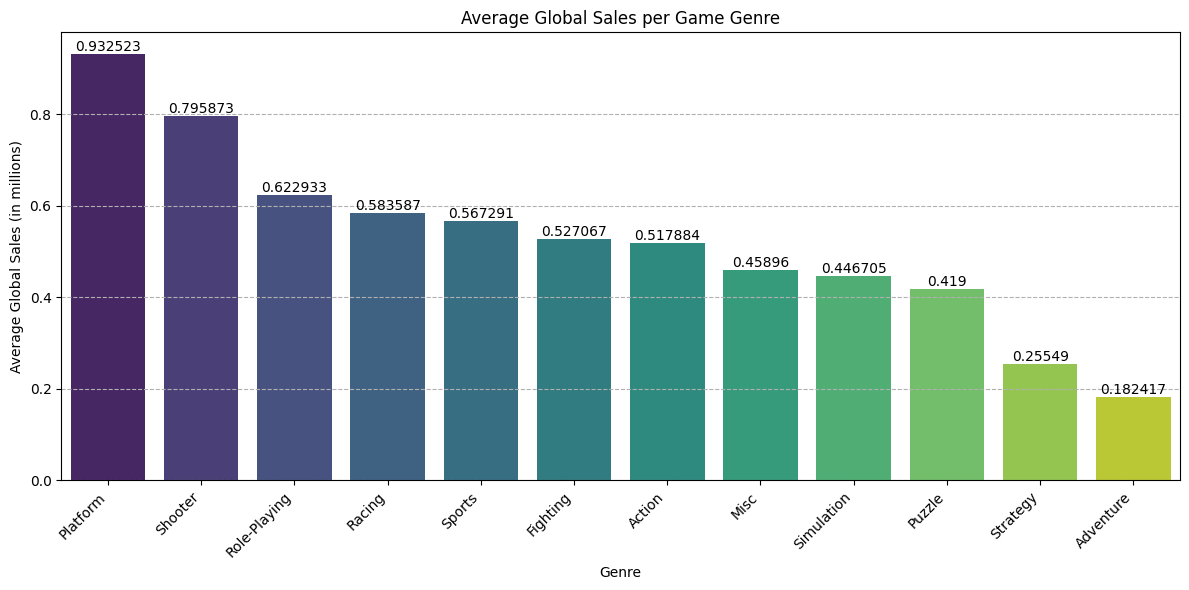

In [258]:
# Generating a pairplot to see the genre of games with the highest Global sales
average_sales_per_genre = df.groupby('Genre')['Global_Sales'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=average_sales_per_genre.index, y=average_sales_per_genre.values, palette='viridis' )

for container in ax.containers:
    ax.bar_label(container)

plt.title('Average Global Sales per Game Genre')
plt.xlabel('Genre')
plt.ylabel('Average Global Sales (in millions)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--')

plt.show()

<ipython-input-259-853cbb263c23>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=average_sales_per_genre.index, y=average_sales_per_genre.values, palette='viridis' )


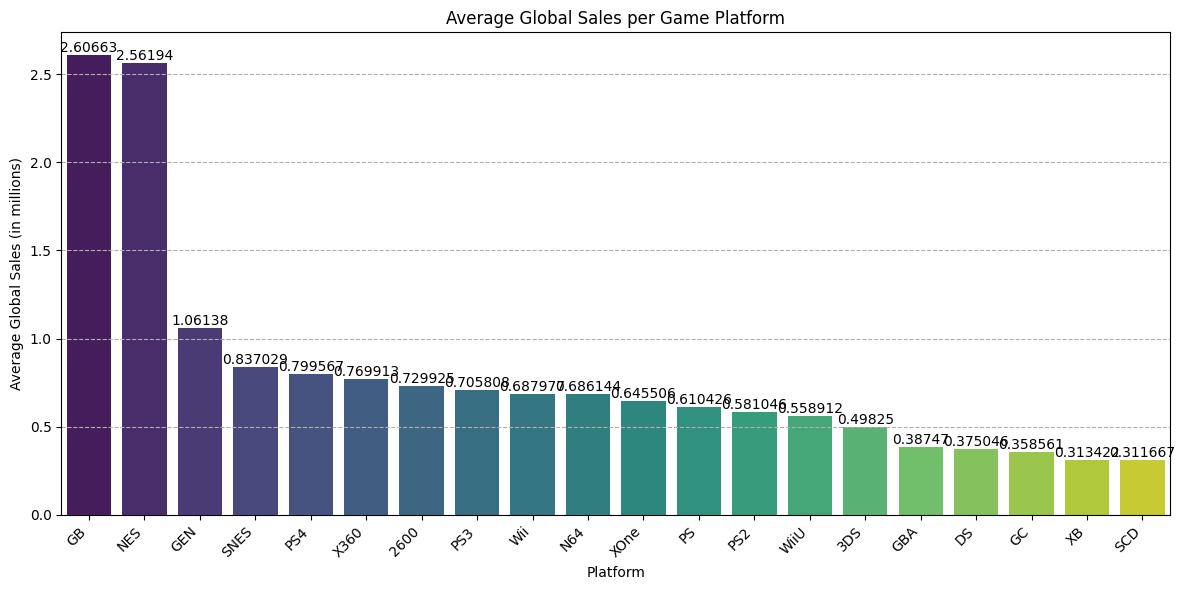

In [259]:
# Generating a pairplot to see the genre of games with the highest Global sales
average_sales_per_genre = df.groupby('Platform')['Global_Sales'].mean().sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=average_sales_per_genre.index, y=average_sales_per_genre.values, palette='viridis' )

for container in ax.containers:
    ax.bar_label(container)

plt.title('Average Global Sales per Game Platform')
plt.xlabel('Platform')
plt.ylabel('Average Global Sales (in millions)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--')

plt.show()

___
* The top 10 games in the Global Sales are all from Nintendo and Wii being the platform with the most games in this top 10
* Platform are usually the fames with the highest ammount of Global Sales
___

In [260]:
# Checking the games with highest critic score
df[['Id', 'Name', 'Platform', 'Year_of_Release', 'Genre',
    'Publisher','Developer','Global_Sales','Critic_Score',
    'Critic_Count', 'User_Score', 'User_Count']].sort_values(by='Critic_Score', ascending=False).head(10)

Id                      Name Platform  Year_of_Release     Genre  \
57      58       Grand Theft Auto IV      PS3           2008.0    Action   
5350  5351               SoulCalibur       DC           1999.0  Fighting   
227    228  Tony Hawk's Pro Skater 2       PS           2000.0    Sports   
51      52       Grand Theft Auto IV     X360           2008.0    Action   
165    166        Grand Theft Auto V     XOne           2014.0    Action   
1877  1878                   NFL 2K1       DC           2000.0    Sports   
42      43        Grand Theft Auto V      PS4           2014.0    Action   
249    250  Tony Hawk's Pro Skater 3      PS2           2001.0    Sports   
38      39      Grand Theft Auto III      PS2           2001.0    Action   
97      98      Super Mario Galaxy 2      Wii           2010.0  Platform   

                 Publisher                Developer  Global_Sales  \
57    Take-Two Interactive           Rockstar North         10.50   
5350    Namco Bandai Games                    Namco          0.34   
227             Activision  Neversoft Entertainment          4.68   
51    Take-Two Interactive           Rockstar North         11.01   
165   Take-Two Interactive           Rockstar North          5.48   
1877                  Sega          Visual Concepts          1.09   
42    Take-Two Interactive           Rockstar North         12.61   
249             Activision  Neversoft Entertainment          4.41   
38    Take-Two Interactive               DMA Design         13.10   
97                Nintendo       Nintendo EAD Tokyo          7.51   

      Critic_Score  Critic_Count  User_Score  User_Count  
57            98.0          64.0         7.5      2833.0  
5350          98.0          24.0         8.8       200.0  
227           98.0          19.0         7.7       299.0  
51            98.0          86.0         7.9      2951.0  
165           97.0          14.0         7.9       764.0  
1877          97.0          22.0         6.0        47.0  
42            97.0          66.0         8.3      2899.0  
249           97.0          34.0         7.5       298.0  
38            97.0          56.0         8.5       664.0  
97            97.0          87.0         9.1      1854.0

In [261]:
# Checking the games with highest critic count
df[['Id', 'Name', 'Platform', 'Year_of_Release', 'Genre',
    'Publisher','Developer','Global_Sales','Critic_Score',
    'Critic_Count', 'User_Score', 'User_Count']].sort_values(by='Critic_Count', ascending=False).head(10)

Id                            Name Platform  Year_of_Release  \
171    172      Uncharted 4: A Thief's End      PS4           2016.0   
463    464                      Heavy Rain      PS3           2010.0   
3606  3607                   Quantum Break     XOne           2016.0   
121    122      Uncharted 2: Among Thieves      PS3           2009.0   
6996  6997                          XCOM 2       PC           2016.0   
1097  1098                      Until Dawn      PS4           2015.0   
1403  1404         Rise of the Tomb Raider     XOne           2015.0   
220    221                  God of War III      PS3           2010.0   
242    243               Halo 5: Guardians     XOne           2015.0   
36      37  Call of Duty: Modern Warfare 2     X360           2009.0   

          Genre                           Publisher             Developer  \
171     Shooter         Sony Computer Entertainment           Naughty Dog   
463   Adventure         Sony Computer Entertainment         Quantic Dream   
3606     Action              Microsoft Game Studios  Remedy Entertainment   
121      Action         Sony Computer Entertainment           Naughty Dog   
6996   Strategy                Take-Two Interactive         Firaxis Games   
1097  Adventure  Sony Computer Entertainment Europe    SuperMassive Games   
1403  Adventure                         Square Enix      Crystal Dynamics   
220      Action         Sony Computer Entertainment      SCE Santa Monica   
242     Shooter              Microsoft Game Studios        343 Industries   
36      Shooter                          Activision         Infinity Ward   

      Global_Sales  Critic_Score  Critic_Count  User_Score  User_Count  
171           5.38          93.0         113.0         7.9      7064.0  
463           3.03          87.0         107.0         7.7      2759.0  
3606          0.56          77.0         106.0         6.8      1659.0  
121           6.66          96.0         105.0         8.8      5187.0  
6996          0.23          88.0         104.0         7.1      1221.0  
1097          1.66          79.0         103.0         8.2      2161.0  
1403          1.38          86.0         102.0         8.0      1288.0  
220           4.80          92.0         101.0         8.7      2633.0  
242           4.48          84.0         101.0         6.4      2438.0  
36           13.47          94.0         100.0         6.3      2698.0

<ipython-input-262-f1be974c54d9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=average_sales_per_genre.index, y=average_sales_per_genre.values, palette='viridis' )


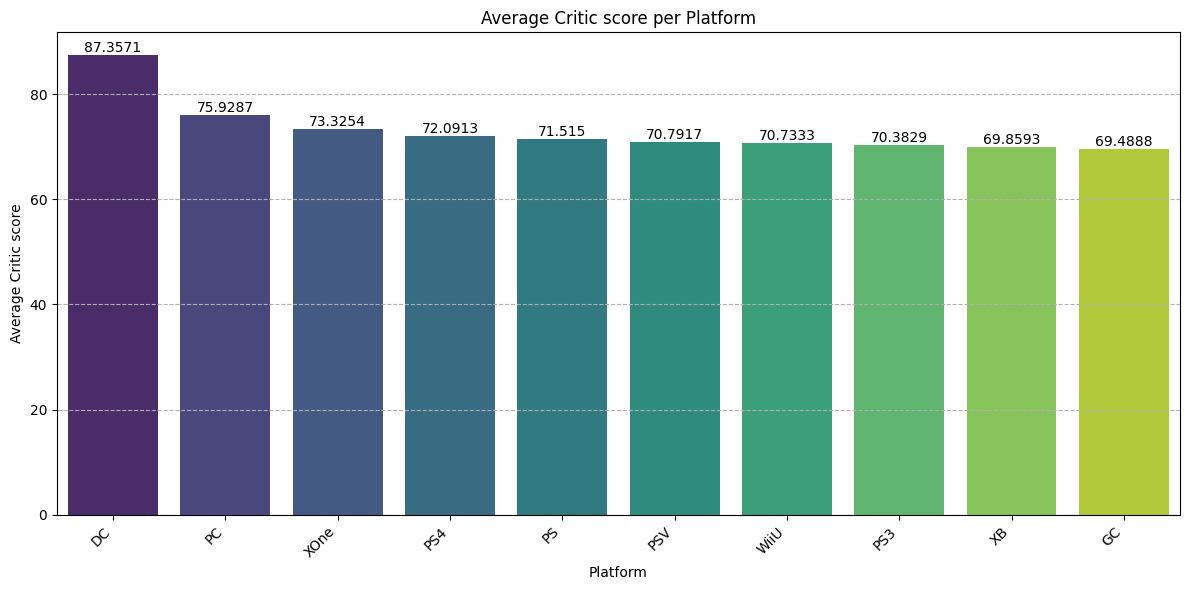

In [262]:
# Generating a pairplot to see the genre of games with the highest Global sales
average_sales_per_genre = df.groupby('Platform')['Critic_Score'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=average_sales_per_genre.index, y=average_sales_per_genre.values, palette='viridis' )

for container in ax.containers:
    ax.bar_label(container)

plt.title('Average Critic score per Platform')
plt.xlabel('Platform')
plt.ylabel('Average Critic score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--')

plt.show()

<ipython-input-263-5a4809ecdfc1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=average_sales_per_genre.index, y=average_sales_per_genre.values, palette='viridis' )


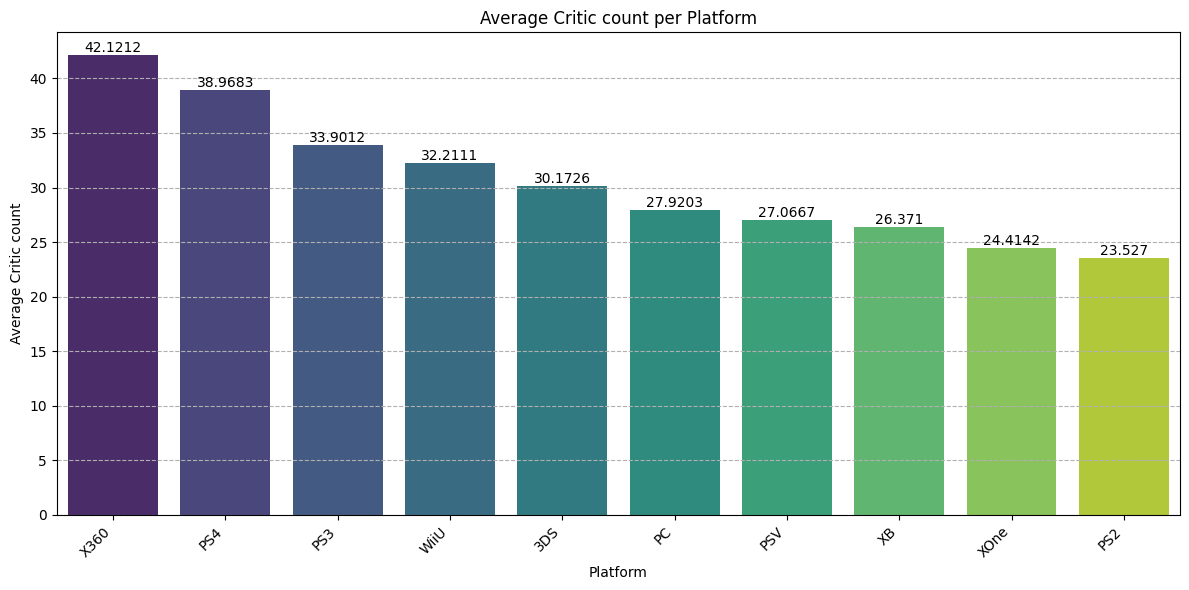

In [263]:
# Generating a pairplot to see the genre of games with the highest Global sales
average_sales_per_genre = df.groupby('Platform')['Critic_Count'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=average_sales_per_genre.index, y=average_sales_per_genre.values, palette='viridis' )

for container in ax.containers:
    ax.bar_label(container)

plt.title('Average Critic count per Platform')
plt.xlabel('Platform')
plt.ylabel('Average Critic count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--')

plt.show()

<ipython-input-264-a28b94f8a484>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=average_sales_per_genre.index, y=average_sales_per_genre.values, palette='viridis' )


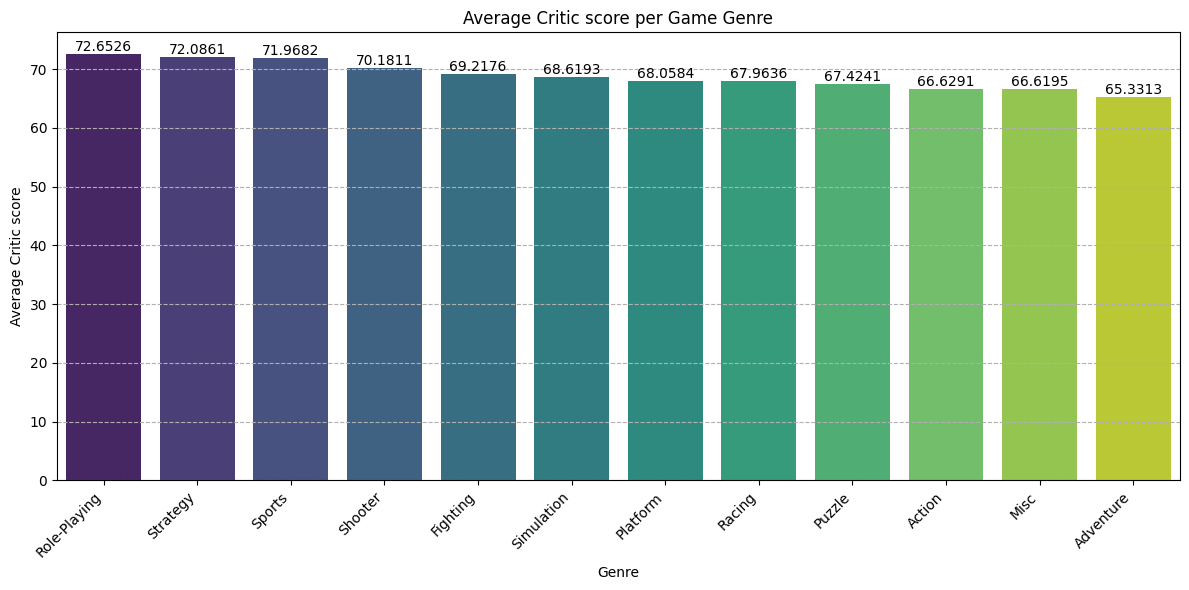

In [264]:
# Generating a pairplot to see the genre of games with the highest Global sales
average_sales_per_genre = df.groupby('Genre')['Critic_Score'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=average_sales_per_genre.index, y=average_sales_per_genre.values, palette='viridis' )

for container in ax.containers:
    ax.bar_label(container)

plt.title('Average Critic score per Game Genre')
plt.xlabel('Genre')
plt.ylabel('Average Critic score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--')

plt.show()

<ipython-input-265-c93b79cc6a5f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=average_sales_per_genre.index, y=average_sales_per_genre.values, palette='viridis' )


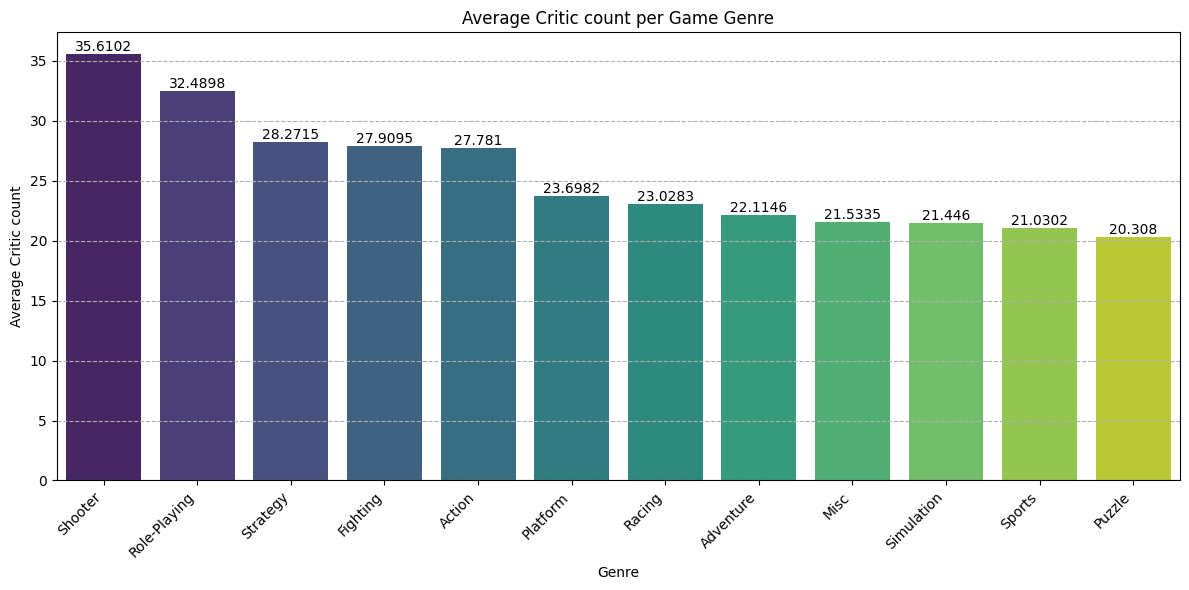

In [265]:
# Generating a pairplot to see the genre of games with the highest Global sales
average_sales_per_genre = df.groupby('Genre')['Critic_Count'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=average_sales_per_genre.index, y=average_sales_per_genre.values, palette='viridis' )

for container in ax.containers:
    ax.bar_label(container)

plt.title('Average Critic count per Game Genre')
plt.xlabel('Genre')
plt.ylabel('Average Critic count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--')

plt.show()

___
* Games with the highest critic socre are not the same with the most amount of critic counts
* Games with the highest critc score are all earlier than 2014
* Only 3 game with the top 10 critic count is from earlir than 2014
* Most games with high crictic count are from newer platforms
___

In [266]:
# Checking the games with highest user score
df[['Id', 'Name', 'Platform', 'Year_of_Release', 'Genre',
    'Publisher','Developer','Global_Sales','Critic_Score',
    'Critic_Count', 'User_Score', 'User_Count']].sort_values(by='User_Score', ascending=False).head(10)

Id                                   Name Platform  Year_of_Release  \
14414  14415                     Breath of Fire III      PSP           2005.0   
8976    8977        Boktai: The Sun is in Your Hand      GBA           2003.0   
3417    3418  Harvest Moon: Friends of Mineral Town      GBA           2003.0   
10106  10107                      Cory in the House       DS           2007.0   
11120  11121                Super Puzzle Fighter II      GBA              NaN   
16631  16632                          Karnaaj Rally      GBA           2003.0   
1645    1646               Golden Sun: The Lost Age      GBA           2002.0   
16550  16551            Wade Hixton's Counter Punch      GBA           2004.0   
5920    5921                    MLB SlugFest Loaded      PS2           2004.0   
1068    1069                        Resident Evil 4       GC           2005.0   

              Genre                     Publisher  \
14414  Role-Playing                        Capcom   
8976   Role-Playing  Konami Digital Entertainment   
3417     Simulation                       Ubisoft   
10106        Action    Disney Interactive Studios   
11120        Puzzle                        Capcom   
16631        Racing                        Jaleco   
1645   Role-Playing                      Nintendo   
16550        Sports     Destination Software, Inc   
5920         Sports                  Midway Games   
1068         Action                        Capcom   

                         Developer  Global_Sales  Critic_Score  Critic_Count  \
14414                       Capcom          0.03           NaN           NaN   
8976                          KCEJ          0.15          83.0          31.0   
3417                          TOSE          0.59          81.0          25.0   
10106               Handheld Games          0.11           NaN           NaN   
11120  Atomic Planet Entertainment          0.09          83.0          22.0   
16631   Infinite Dreams, Paragon 5          0.01          81.0           9.0   
1645     Camelot Software Planning          1.22          86.0          29.0   
16550                Inferno Games          0.01          78.0          13.0   
5920                 Point of View          0.30          77.0          30.0   
1068                        Capcom          1.69          96.0          82.0   

       User_Score  User_Count  
14414         9.7         6.0  
8976          9.6        16.0  
3417          9.6       116.0  
10106         9.5      1273.0  
11120         9.5         4.0  
16631         9.5         4.0  
1645          9.5       150.0  
16550         9.5         4.0  
5920          9.5         4.0  
1068          9.4       767.0

In [267]:
# Checking the games with highest user count
df[['Id', 'Name', 'Platform', 'Year_of_Release', 'Genre',
    'Publisher','Developer','Global_Sales','Critic_Score',
    'Critic_Count', 'User_Score', 'User_Count']].sort_values(by='User_Count', ascending=False).head(10)

Id                            Name Platform  Year_of_Release  \
2851    2852        The Witcher 3: Wild Hunt       PC           2015.0   
303      304        The Witcher 3: Wild Hunt      PS4           2015.0   
11288  11289          Counter-Strike: Source       PC           2004.0   
192      193                      Diablo III       PC           2012.0   
313      314     The Elder Scrolls V: Skyrim       PC           2011.0   
29        30  Call of Duty: Modern Warfare 3     X360           2011.0   
665      666                     Half-Life 2       PC           2004.0   
149      150                  The Last of Us      PS3           2013.0   
1530    1531                       Fallout 4       PC           2015.0   
3067    3068               BioShock Infinite       PC           2013.0   

              Genre                           Publisher  \
2851   Role-Playing                  Namco Bandai Games   
303    Role-Playing                  Namco Bandai Games   
11288       Shooter                       Vivendi Games   
192    Role-Playing                          Activision   
313    Role-Playing                  Bethesda Softworks   
29          Shooter                          Activision   
665         Shooter                       Vivendi Games   
149          Action  Sony Computer Entertainment Europe   
1530   Role-Playing                  Bethesda Softworks   
3067        Shooter                Take-Two Interactive   

                               Developer  Global_Sales  Critic_Score  \
2851               CD Projekt Red Studio          0.72          93.0   
303                CD Projekt Red Studio          3.97          92.0   
11288                     Valve Software          0.08          88.0   
192               Blizzard Entertainment          5.14          88.0   
313                Bethesda Game Studios          3.88          94.0   
29     Infinity Ward, Sledgehammer Games         14.73          88.0   
665                       Valve Software          2.37          96.0   
149                          Naughty Dog          5.87          95.0   
1530               Bethesda Game Studios          1.29          84.0   
3067                    Irrational Games          0.66          94.0   

       Critic_Count  User_Score  User_Count  
2851           32.0         9.3     10665.0  
303            79.0         9.2     10179.0  
11288           9.0         8.9      9851.0  
192            86.0         4.0      9629.0  
313            32.0         8.1      9073.0  
29             81.0         3.4      8713.0  
665            81.0         9.1      8665.0  
149            98.0         9.1      8003.0  
1530           38.0         5.4      7512.0  
3067           68.0         8.5      7322.0

<ipython-input-268-12ecd0fbe142>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=average_sales_per_genre.index, y=average_sales_per_genre.values, palette='viridis' )


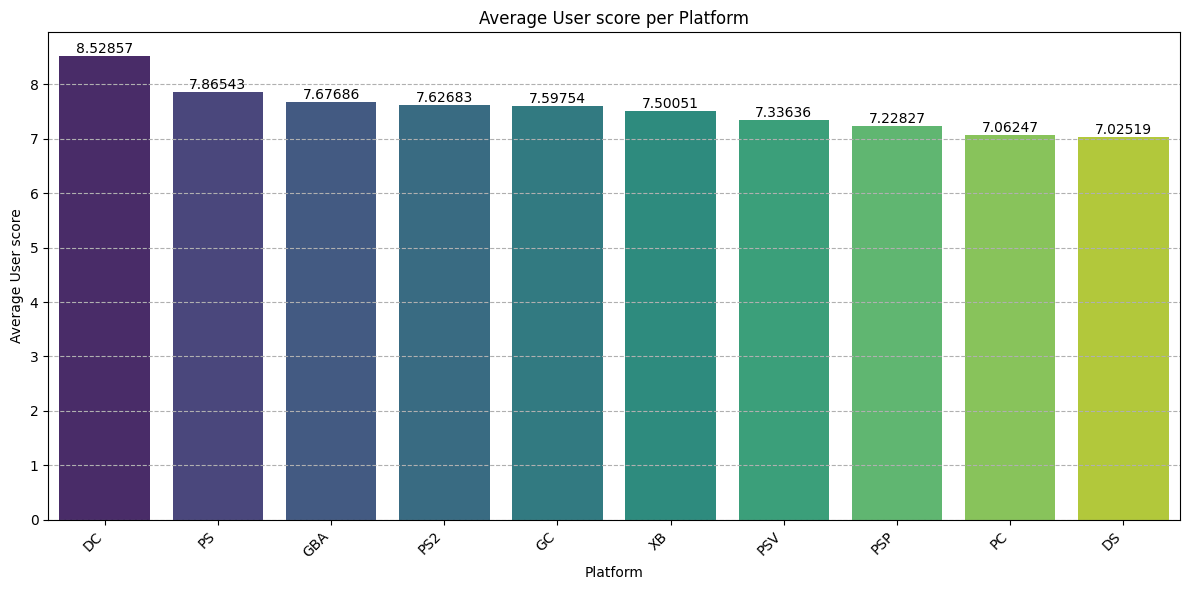

In [268]:
# Generating a pairplot to see the genre of games with the highest Global sales
average_sales_per_genre = df.groupby('Platform')['User_Score'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=average_sales_per_genre.index, y=average_sales_per_genre.values, palette='viridis' )

for container in ax.containers:
    ax.bar_label(container)

plt.title('Average User score per Platform')
plt.xlabel('Platform')
plt.ylabel('Average User score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--')

plt.show()

<ipython-input-269-288f94382f52>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=average_sales_per_genre.index, y=average_sales_per_genre.values, palette='viridis' )


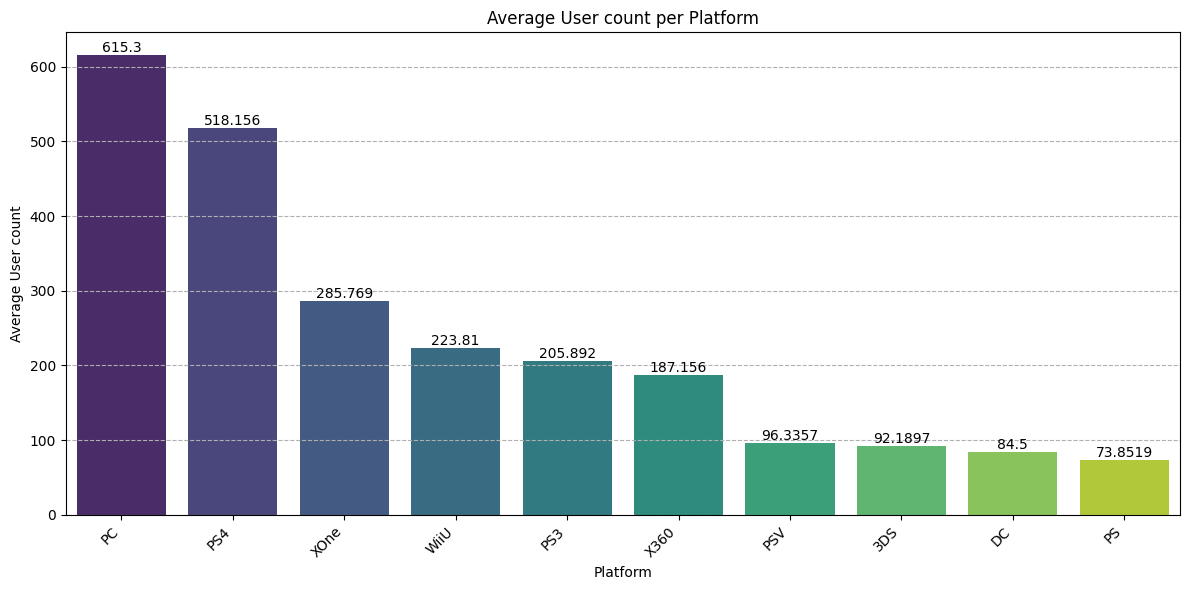

In [269]:
# Generating a pairplot to see the genre of games with the highest Global sales
average_sales_per_genre = df.groupby('Platform')['User_Count'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=average_sales_per_genre.index, y=average_sales_per_genre.values, palette='viridis' )

for container in ax.containers:
    ax.bar_label(container)

plt.title('Average User count per Platform')
plt.xlabel('Platform')
plt.ylabel('Average User count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--')

plt.show()

<ipython-input-270-ef0c7f44920f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=average_sales_per_genre.index, y=average_sales_per_genre.values, palette='viridis' )


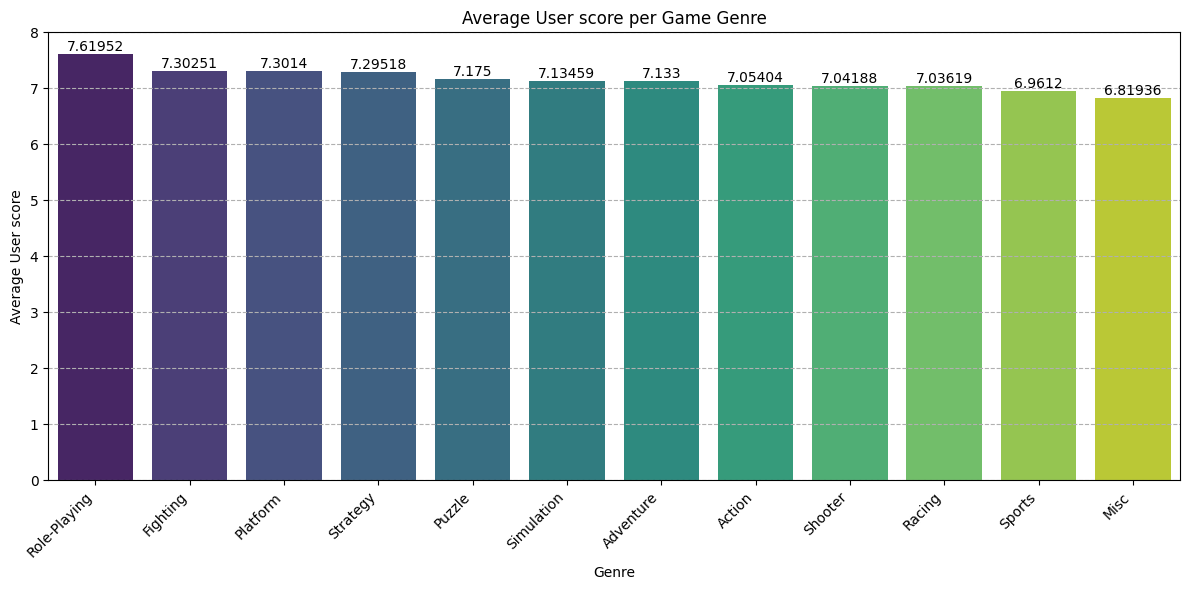

In [270]:
# Generating a pairplot to see the genre of games with the highest Global sales
average_sales_per_genre = df.groupby('Genre')['User_Score'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=average_sales_per_genre.index, y=average_sales_per_genre.values, palette='viridis' )

for container in ax.containers:
    ax.bar_label(container)

plt.title('Average User score per Game Genre')
plt.xlabel('Genre')
plt.ylabel('Average User score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--')

plt.show()

<ipython-input-271-7bba6fddcf5a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=average_sales_per_genre.index, y=average_sales_per_genre.values, palette='viridis' )


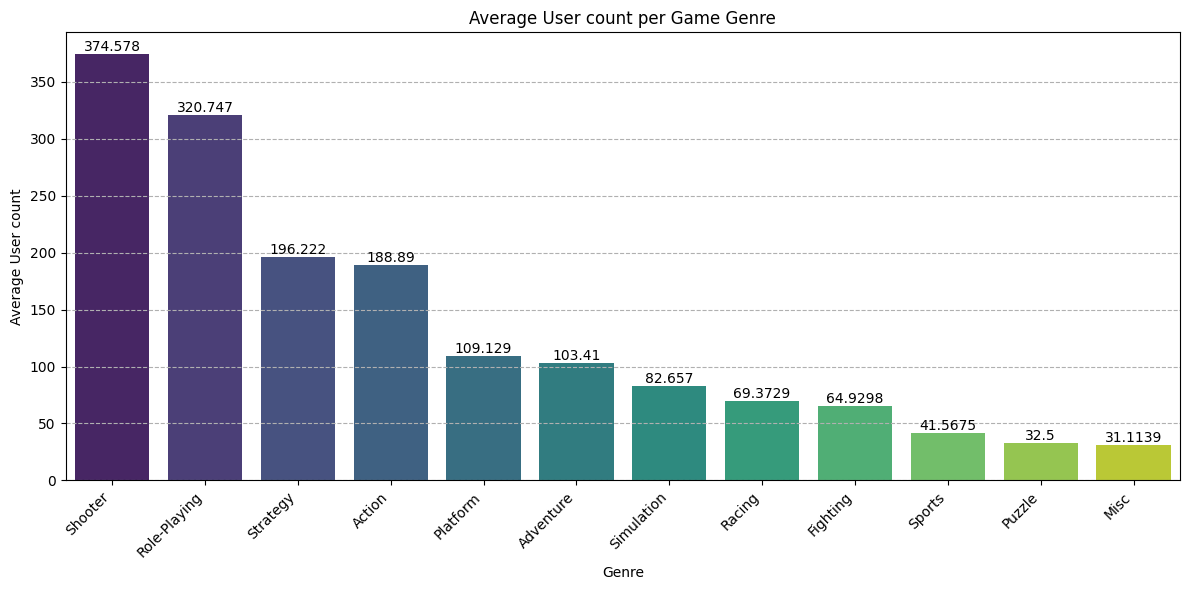

In [271]:
# Generating a pairplot to see the genre of games with the highest Global sales
average_sales_per_genre = df.groupby('Genre')['User_Count'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=average_sales_per_genre.index, y=average_sales_per_genre.values, palette='viridis' )

for container in ax.containers:
    ax.bar_label(container)

plt.title('Average User count per Game Genre')
plt.xlabel('Genre')
plt.ylabel('Average User count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--')

plt.show()

___
* Analysis from user score and count follow a simmilar pattern from the critic numbers
  * Older games with higher score
  * Newer games with higher count
  * Newer platforms receive more user counts than older ones
___

In [272]:
df_recent.columns

Index(['Id', 'Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher',
       'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales',
       'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Developer',
       'Rating'],
      dtype='object')

<ipython-input-273-38a32831cc9d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Critic_Score'] = pd.to_numeric(df_cleaned['Critic_Score'], errors='coerce')


Linear Regression Equation: User_Count = 11.0846 * Critic_Score + -605.2567
R-squared Value: 0.0699


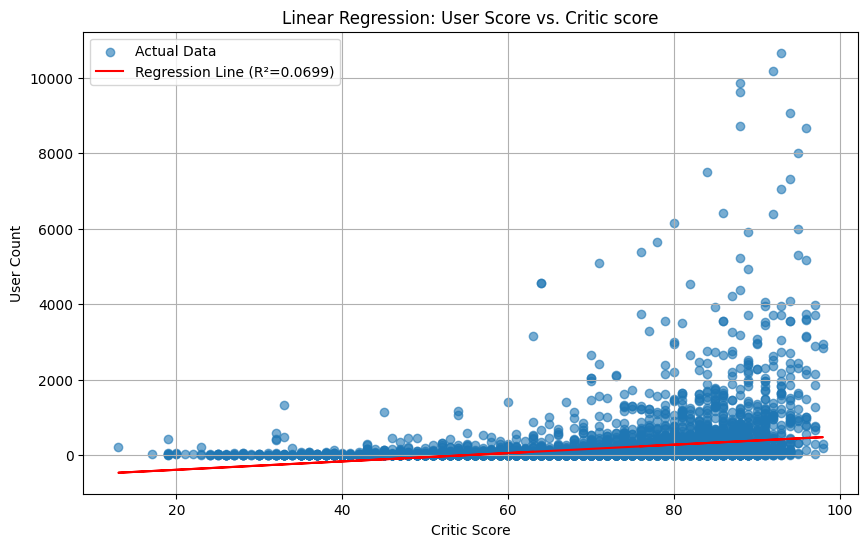

In [273]:
# Handle potential missing values (NaNs) in the columns
df_cleaned = df.dropna(subset=['Critic_Score', 'User_Count'])

# Convert 'Year_of_Release' to numeric if it's not already
df_cleaned['Critic_Score'] = pd.to_numeric(df_cleaned['Critic_Score'], errors='coerce')
df_cleaned = df_cleaned.dropna(subset=['Critic_Score']) # Drop any newly introduced NaNs

# Extract the independent variable (x) and dependent variable (y)
x = df_cleaned['Critic_Score']
y = df_cleaned['User_Count']

# Perform linear regression using scipy.stats.linregress
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Print the regression equation and R-squared value
print(f"Linear Regression Equation: User_Count = {slope:.4f} * Critic_Score + {intercept:.4f}")
print(f"R-squared Value: {r_value**2:.4f}")

# Create the regression line
regression_line = slope * x + intercept

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Actual Data', alpha=0.6)
plt.plot(x, regression_line, color='red', label=f'Regression Line (R²={r_value**2:.4f})')

# Add labels and title
plt.xlabel('Critic Score')
plt.ylabel('User Count')
plt.title('Linear Regression: User Score vs. Critic score')
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-274-8abe98cbd78c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Critic_Score'] = pd.to_numeric(df_cleaned['Critic_Score'], errors='coerce')


Linear Regression Equation: User_Score = 0.0603 * Critic_Score + 2.9454
R-squared Value: 0.3374


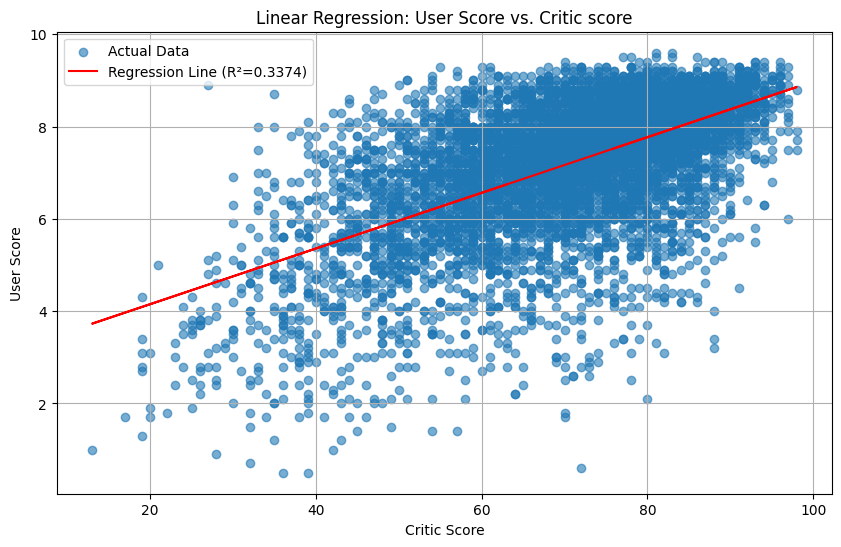

In [274]:
# Handle potential missing values (NaNs) in the columns
df_cleaned = df.dropna(subset=['Critic_Score', 'User_Score'])

# Convert 'Year_of_Release' to numeric if it's not already
df_cleaned['Critic_Score'] = pd.to_numeric(df_cleaned['Critic_Score'], errors='coerce')
df_cleaned = df_cleaned.dropna(subset=['Critic_Score']) # Drop any newly introduced NaNs

# Extract the independent variable (x) and dependent variable (y)
x = df_cleaned['Critic_Score']
y = df_cleaned['User_Score']

# Perform linear regression using scipy.stats.linregress
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Print the regression equation and R-squared value
print(f"Linear Regression Equation: User_Score = {slope:.4f} * Critic_Score + {intercept:.4f}")
print(f"R-squared Value: {r_value**2:.4f}")

# Create the regression line
regression_line = slope * x + intercept

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Actual Data', alpha=0.6)
plt.plot(x, regression_line, color='red', label=f'Regression Line (R²={r_value**2:.4f})')

# Add labels and title
plt.xlabel('Critic Score')
plt.ylabel('User Score')
plt.title('Linear Regression: User Score vs. Critic score')
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-275-652369a830ff>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Critic_Count'] = pd.to_numeric(df_cleaned['Critic_Count'], errors='coerce')


Linear Regression Equation: User_Score = 0.0146 * Critic_Count + 6.7623
R-squared Value: 0.0377


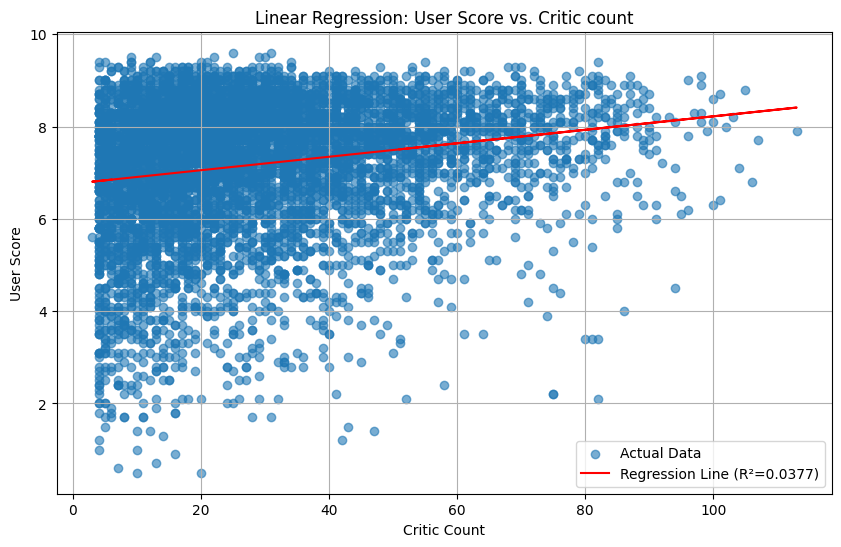

In [275]:
# Handle potential missing values (NaNs) in the columns
df_cleaned = df.dropna(subset=['Critic_Count', 'User_Score'])

# Convert 'Year_of_Release' to numeric if it's not already
df_cleaned['Critic_Count'] = pd.to_numeric(df_cleaned['Critic_Count'], errors='coerce')
df_cleaned = df_cleaned.dropna(subset=['Critic_Count']) # Drop any newly introduced NaNs

# Extract the independent variable (x) and dependent variable (y)
x = df_cleaned['Critic_Count']
y = df_cleaned['User_Score']

# Perform linear regression using scipy.stats.linregress
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Print the regression equation and R-squared value
print(f"Linear Regression Equation: User_Score = {slope:.4f} * Critic_Count + {intercept:.4f}")
print(f"R-squared Value: {r_value**2:.4f}")

# Create the regression line
regression_line = slope * x + intercept

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Actual Data', alpha=0.6)
plt.plot(x, regression_line, color='red', label=f'Regression Line (R²={r_value**2:.4f})')

# Add labels and title
plt.xlabel('Critic Count')
plt.ylabel('User Score')
plt.title('Linear Regression: User Score vs. Critic count')
plt.legend()
plt.grid(True)
plt.show()

### List of correlations that can be noticed from the pairplot above:
1. 2008 was the year with most game releases
2. List of plataforms with most games published:
$$
\begin{array}{l|l}
\hline
\textbf{Platform} & \textbf{Game_quantity}\\
\hline
\text{PS2} & \text{2161}\\
\hline
\text{DS} & \text{2152}\\
\hline
\text{PS3} & \text{1331}\\
\hline
\text{Wii} & \text{1320}\\
\hline
\text{X360} & \text{1262}\\
\hline
\end{array}
$$
3.


# Insights analysing the full 40 year spam of data

1. The analysis of global sales indicate that:
  * Historically platforms developed from Nintendo are the ones with the highest averavge global sales
  * Play Station 4 is non Nintendo pltform with the average global sales
  * Considering the type of games, platform game have the highest average global sale
4. The analysis of User and Critic score and count indicate that:
  * E
5.




